#  Hamza Hussain Omran 22011501

# Imports

In [ ]:
import sqlite3
import pandas as pd
import csv
from IPython.display import Image, display # to print the image in the jupyter notebook console

# Create Connection and Get Cursor

In [ ]:
con=sqlite3.connect('HR.db')
cur=con.cursor()

# Data In The Database Info.

The columns represent various attributes of the applicants and their professional background.

## Columns Overview

### 1. **Age**
- **Type:** Categorical
- **Description:** Age of the applicant. Categories are:
  - `>35 years old`
  - `<35 years old`

### 2. **EdLevel**
- **Type:** Categorical
- **Description:** Education level of the applicant. Possible values:
  - `Undergraduate`
  - `Master`
  - `PhD`
  - (Other levels can be added based on the dataset)

### 3. **Gender**
- **Type:** Categorical
- **Description:** Gender of the applicant. Categories include:
  - `Man = 1`
  - `Woman = 0`

### 4. **MainBranch**
- **Type:** Categorical
- **Description:** Whether the applicant is a professional developer. Values:
  - `Professional Developer`
  - `Non-Professional Developer`

### 5. **YearsCode**
- **Type:** Integer
- **Description:** Number of years the applicant has been coding.

### 6. **YearsCodePro**
- **Type:** Integer
- **Description:** Number of years the applicant has been coding in a professional context.

### 7. **PreviousSalary**
- **Type:** Float
- **Description:** The applicant's previous job salary.

### 8. **ComputerSkills**
- **Type:** Integer
- **Description:** The number of computer skills known by the applicant.

### 9. **Employed**
- **Type:** Categorical (Target Variable)
- **Description:** Whether the applicant has been hired.
  - `Yes`
  - `No`


# Create The Table To Use It Initially To Store Data From CSV

In [ ]:
cur.execute(f"""
CREATE TABLE EmployeesRecords (
    ID INTEGER PRIMARY KEY AUTOINCREMENT,
    Age INTEGER,
    Accessibility INTEGER,
    EducationLevel TEXT,
    Gender TEXT,
    WorkedBefore INTEGER,
    MentalHealth INTEGER,
    MainBranch TEXT,
    YearsOfCoding INTEGER,
    YearsOfCodingWhileWorking INTEGER,
    Country TEXT,
    PreviousSalary REAL,
    HaveWorkedWith TEXT,
    ComputerSkills INTEGER,
    Employed INTEGER
)
""")

cur.execute("INSERT OR IGNORE INTO sqlite_sequence (name, seq) VALUES ('EmployeesRecords', 22010);")
cur.execute("UPDATE sqlite_sequence SET seq = 22010 WHERE name = 'EmployeesRecords';")



# Get Records From CSV File And Insert It Into The EmployeesRecords Table

In [ ]:
with open("stackoverflow_full .csv", 'r') as file:
    reader = csv.reader(file)
    headers = next(reader)  # Skip header row

    rows_to_insert = []
    for count, row in enumerate(reader):  # enumerate returns the index and list of the arrest of the row
        if count >= 50000:  # stop after 50,000 rows
            break

        rows_to_insert.append(row[1:])  # skip the first column

    cur.executemany(f"""
    INSERT INTO EmployeesRecords (
        Age, Accessibility, EducationLevel, Gender, WorkedBefore, MentalHealth,
        MainBranch, YearsOfCoding, YearsOfCodingWhileWorking, Country, PreviousSalary,
        HaveWorkedWith, ComputerSkills, Employed
    )
    VALUES ({','.join(['?'] * (len(headers) - 1))});  -- Adjust placeholders for 14 columns
    """, rows_to_insert)

# Print The First 100 Records In The EmployeesRecords Table

In [ ]:
res = cur.execute("select * from EmployeesRecords;")

for record in res.fetchmany(100):
    print(record)

(22011, '<35', 'No', 'Master', '1', 'Man', 'No', 'Dev', 7, 4, 'Sweden', 51552.0, 'C++;Python;Git;PostgreSQL', 4, 0)
(22012, '<35', 'No', 'Undergraduate', '1', 'Man', 'No', 'Dev', 12, 5, 'Spain', 46482.0, 'Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;TypeScript;Git;Express;React.js;Vue.js;AWS;PostgreSQL', 12, 1)
(22013, '<35', 'No', 'Master', '1', 'Man', 'No', 'Dev', 15, 6, 'Germany', 77290.0, 'C;C++;Java;Perl;Ruby;Git;Ruby on Rails', 7, 0)
(22014, '<35', 'No', 'Undergraduate', '1', 'Man', 'No', 'Dev', 9, 6, 'Canada', 46135.0, 'Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Git;jQuery;Laravel;Ruby on Rails;AWS;MySQL;PostgreSQL', 13, 0)
(22015, '>35', 'No', 'PhD', '0', 'Man', 'No', 'NotDev', 40, 30, 'Singapore', 160932.0, 'C++;Python', 2, 0)
(22016, '<35', 'No', 'Master', '1', 'Man', 'No', 'Dev', 9, 2, 'France', 38915.0, 'JavaScript;Python;Docker;Git;MySQL', 5, 0)
(22017, '>35', 'No', 'Master', '1', 'Man', 'No', 'Dev', 26, 18, 'Germany', 77831.0, 'C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;T

# Creating Tables To Fill Data In It For Normalization

In [ ]:
con.execute("PRAGMA foreign_keys = ON;") # to ensure applying foreign keys constrains

cur.execute("""CREATE TABLE EducationLevels (
    EducationLevelID INTEGER PRIMARY KEY,
    EducationLevel TEXT
);
""")

cur.execute("""CREATE TABLE Genders (
    GenderID INTEGER PRIMARY KEY,
    Gender TEXT
);
""")

cur.execute("""CREATE TABLE MainBranches (
    MainBranchID INTEGER PRIMARY KEY,
    MainBranch TEXT
);
""")

cur.execute("""CREATE TABLE Countries (
    CountryID INTEGER PRIMARY KEY,
    CountryName TEXT
);
""")

cur.execute("""CREATE TABLE Skills (
    SkillID INTEGER PRIMARY KEY,
    SkillName TEXT
);
""")

cur.execute("""CREATE TABLE Employees (
    EmployeeID INTEGER PRIMARY KEY,
    Age INTEGER,
    Accessibility INTEGER,
    EducationLevelID INTEGER,
    GenderID INTEGER,
    WorkedBefore INTEGER,
    MentalHealth INTEGER,
    MainBranchID INTEGER,
    YearsOfCoding INTEGER,
    YearsOfCodingWhileWorking INTEGER,
    CountryID INTEGER,
    PreviousSalary REAL,
    ComputerSkills INTEGER,
    Employed INTEGER,

    FOREIGN KEY (EducationLevelID) REFERENCES EducationLevels(EducationLevelID),
    FOREIGN KEY (GenderID) REFERENCES Genders(GenderID),
    FOREIGN KEY (MainBranchID) REFERENCES MainBranches(MainBranchID),
    FOREIGN KEY (CountryID) REFERENCES Countries(CountryID)
);
""")

cur.execute("INSERT OR IGNORE INTO sqlite_sequence (name, seq) VALUES ('Employees', 22010);")
cur.execute("UPDATE sqlite_sequence SET seq = 22010 WHERE name = 'Employees';")

cur.execute("""CREATE TABLE EmployeeSkills (
    EmployeeSkillID INTEGER PRIMARY KEY AUTOINCREMENT,
    EmployeeID INTEGER,
    SkillID INTEGER,
    FOREIGN KEY (EmployeeID) REFERENCES Employees(EmployeeID),
    FOREIGN KEY (SkillID) REFERENCES Skills(SkillID)
);
""")


# Get The Value Of Each Column And Insert It In The Corresponding Table Only If It Is Not Repeated

In [ ]:
cur.execute("SELECT DISTINCT EducationLevel FROM EmployeesRecords")
education_levels = cur.fetchall()
for level in education_levels:
    cur.execute("INSERT OR IGNORE INTO EducationLevels (EducationLevel) VALUES (?)", (level[0],))
    # (level[0],) to enusre it is passed as tuple and INSERT OR IGNORE to ensure there is no duplicate values in the table


cur.execute("SELECT DISTINCT Gender FROM EmployeesRecords")
genders = cur.fetchall()
for gender in genders:
    cur.execute("INSERT OR IGNORE INTO Genders (Gender) VALUES (?)", (gender[0],))


cur.execute("SELECT DISTINCT MainBranch FROM EmployeesRecords")
main_branches = cur.fetchall()
for branch in main_branches:
    cur.execute("INSERT OR IGNORE INTO MainBranches (MainBranch) VALUES (?)", (branch[0],))


cur.execute("SELECT DISTINCT Country FROM EmployeesRecords")
countries = cur.fetchall()
for country in countries:
    cur.execute("INSERT OR IGNORE INTO Countries (CountryName) VALUES (?)", (country[0],))

### Code Explanation

1. **Extract Foreign Key (FK) Values For each record**:  

2. **Insert Data into the `Employees` Table**:  

3. **Extract and Store Unique Skills**:  

4. **Result**:  
   the `all_skills_set` will contain all the unique skills across all employee records, and the employee data will be correctly stored in the `Employees` table with the appropriate foreign key references.


In [ ]:
cur.execute("""
    SELECT ID, Age, Accessibility, EducationLevel, Gender, WorkedBefore, MentalHealth,
           MainBranch, YearsOfCoding, YearsOfCodingWhileWorking, Country, PreviousSalary,
           ComputerSkills, Employed, HaveWorkedWith
    FROM EmployeesRecords
""")
records = cur.fetchall()

# store unique skills
all_skills_set = set()

for record in records:
    # get foreign key IDs
    cur.execute("SELECT EducationLevelID FROM EducationLevels WHERE EducationLevel = ?", (record[3],))
    education_level_id = cur.fetchone()[0] # since the return is a list and we know the list contain one value

    cur.execute("SELECT GenderID FROM Genders WHERE Gender = ?", (record[4],))
    gender_id = cur.fetchone()[0]

    cur.execute("SELECT MainBranchID FROM MainBranches WHERE MainBranch = ?", (record[7],))
    main_branch_id = cur.fetchone()[0]

    cur.execute("SELECT CountryID FROM Countries WHERE CountryName = ?", (record[10],))
    country_id = cur.fetchone()[0]


    cur.execute("""
        INSERT INTO Employees (EmployeeID, Age, Accessibility, EducationLevelID, GenderID, WorkedBefore,
                               MentalHealth, MainBranchID, YearsOfCoding, YearsOfCodingWhileWorking,
                               CountryID, PreviousSalary, ComputerSkills, Employed)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, (record[0], record[1], record[2], education_level_id, gender_id, record[5], record[6], main_branch_id,
          record[8], record[9], country_id, record[11], record[12], record[13]))


    have_worked_with = record[14]
    if have_worked_with:
        skills = have_worked_with.split(';')

        # we add to the set since the set cannot contain two elements of the same value
        for skill in skills:
            skill = skill.strip()  # remove spaces
            if skill:  # make sure skill is not empty
                all_skills_set.add(skill)

### Code Summary

1. Inserted unique values into the `Skills` table using the `all_skills_set` (ensuring uniqueness due to the set type).
2. Mapped the skills and corresponding `EmployeeID` to the `EmployeeSkills` table.


In [ ]:
# insert unique skills into Skills table
for skill in all_skills_set:
    cur.execute("INSERT OR IGNORE INTO Skills (SkillName) VALUES (?)", (skill,))

# mapping the skills to the EmployeeSkills table

for record in records:
    employee_id = record[0]

    have_worked_with = record[14]  # skills from the HaveWorkedWith column
    if have_worked_with:
        skills = have_worked_with.split(';')

        for skill in skills:
            skill = skill.strip()
            if skill:
                cur.execute("SELECT SkillID FROM Skills WHERE SkillName = ?", (skill,))
                skill_id = cur.fetchone()
                if skill_id:

                    cur.execute("INSERT INTO EmployeeSkills (EmployeeID, SkillID) VALUES (?, ?)",
                                (employee_id, skill_id[0]))


# The First 100 Records Of Each Table

In [ ]:
tables = ['Employees', 'EducationLevels', 'Genders', 'MainBranches', 'Countries', 'Skills', 'EmployeeSkills']
for table in tables:
    res = cur.execute(f"SELECT * FROM {table};")
    rows = res.fetchmany(100)
    print(f"Data from {table}:")
    for row in rows:
        print(row)
    print("\n")

Data from Employees:
(22011, '<35', 'No', 1, 1, 'Man', 'No', 1, 7, 4, 1, 51552.0, 4, 0)
(22012, '<35', 'No', 2, 1, 'Man', 'No', 1, 12, 5, 2, 46482.0, 12, 1)
(22013, '<35', 'No', 1, 1, 'Man', 'No', 1, 15, 6, 3, 77290.0, 7, 0)
(22014, '<35', 'No', 2, 1, 'Man', 'No', 1, 9, 6, 4, 46135.0, 13, 0)
(22015, '>35', 'No', 3, 2, 'Man', 'No', 2, 40, 30, 5, 160932.0, 2, 0)
(22016, '<35', 'No', 1, 1, 'Man', 'No', 1, 9, 2, 6, 38915.0, 5, 0)
(22017, '>35', 'No', 1, 1, 'Man', 'No', 1, 26, 18, 3, 77831.0, 17, 1)
(22018, '<35', 'No', 1, 1, 'Man', 'No', 2, 14, 5, 7, 81319.0, 4, 0)
(22019, '>35', 'No', 2, 1, 'Man', 'No', 1, 39, 21, 8, 68507.0, 3, 0)
(22020, '>35', 'No', 1, 1, 'Man', 'No', 1, 20, 16, 9, 37752.0, 6, 0)
(22021, '<35', 'No', 2, 1, 'Man', 'Yes', 1, 4, 2, 10, 122580.0, 18, 1)
(22022, '<35', 'No', 2, 1, 'Man', 'Yes', 1, 6, 2, 11, 11832.0, 13, 1)
(22023, '<35', 'No', 1, 1, 'Man', 'No', 1, 19, 10, 3, 60535.0, 5, 0)
(22024, '<35', 'No', 2, 1, 'Man', 'No', 1, 8, 0, 12, 103000.0, 7, 0)
(22025, '<35', 

# Database After Applying Normalization

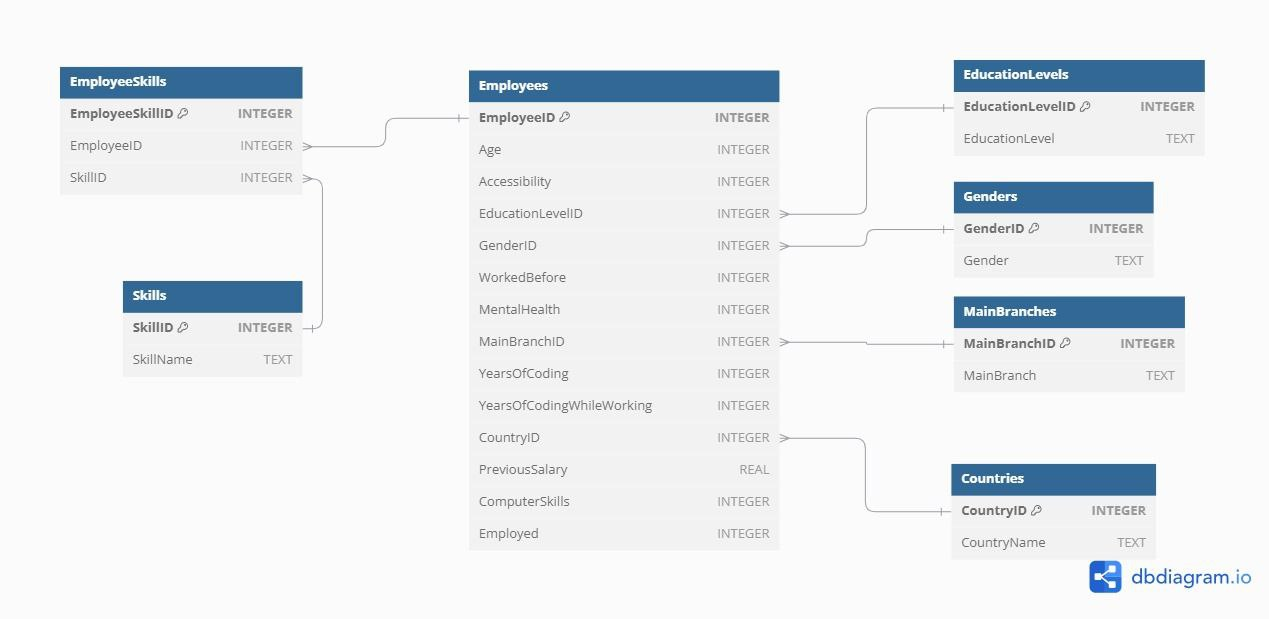

In [ ]:
display(Image(filename="EmployeesDB.jpg"))

# Add Employee Function

In [ ]:
def add_employee(Age, Accessibility, EducationLevel, Gender, WorkedBefore, MentalHealth, MainBranch,
                 YearsOfCoding, YearsOfCodingWhileWorking, Country, PreviousSalary, ComputerSkills, Employed, skills):

    cur.execute("SELECT EducationLevelID FROM EducationLevels WHERE EducationLevel = ?", (EducationLevel,))
    education_level_id = cur.fetchone()
    if education_level_id is None:
        cur.execute("INSERT INTO EducationLevels (EducationLevel) VALUES (?)", (EducationLevel,))
        education_level_id = cur.lastrowid
    else:
        education_level_id = education_level_id[0]

    cur.execute("SELECT GenderID FROM Genders WHERE Gender = ?", (Gender,))
    gender_id = cur.fetchone()
    if gender_id is None:
        cur.execute("INSERT INTO Genders (Gender) VALUES (?)", (Gender,))
        gender_id = cur.lastrowid
    else:
        gender_id = gender_id[0]

    cur.execute("SELECT MainBranchID FROM MainBranches WHERE MainBranch = ?", (MainBranch,))
    main_branch_id = cur.fetchone()
    if main_branch_id is None:
        cur.execute("INSERT INTO MainBranches (MainBranch) VALUES (?)", (MainBranch,))
        main_branch_id = cur.lastrowid
    else:
        main_branch_id = main_branch_id[0]

    # Get or insert CountryID
    cur.execute("SELECT CountryID FROM Countries WHERE CountryName = ?", (Country,))
    country_id = cur.fetchone()
    if country_id is None:
        cur.execute("INSERT INTO Countries (CountryName) VALUES (?)", (Country,))
        country_id = cur.lastrowid
    else:
        country_id = country_id[0]

    cur.execute("""
        INSERT INTO Employees (Age, Accessibility, EducationLevelID, GenderID, WorkedBefore,
                               MentalHealth, MainBranchID, YearsOfCoding, YearsOfCodingWhileWorking,
                               CountryID, PreviousSalary, ComputerSkills, Employed)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    """, (Age, Accessibility, education_level_id, gender_id, WorkedBefore, MentalHealth, main_branch_id,
          YearsOfCoding, YearsOfCodingWhileWorking, country_id, PreviousSalary, ComputerSkills, Employed))

    # The ID of the newly inserted employee
    employee_id = cur.lastrowid

    for skill_name in skills:
        cur.execute("SELECT SkillID FROM Skills WHERE SkillName = ?", (skill_name,))
        skill_id = cur.fetchone()

        if skill_id is None:
            cur.execute("INSERT INTO Skills (SkillName) VALUES (?)", (skill_name,))
            skill_id = cur.lastrowid
        else:
            skill_id = skill_id[0]

        cur.execute("""
            INSERT INTO EmployeeSkills (EmployeeID, SkillID)
            VALUES (?, ?)
        """, (employee_id, skill_id))

    return employee_id

## Example

In [ ]:
Age = 30
Accessibility = 1  # 1: Yes, 0: No
EducationLevel = 'Master'
Gender = 'Male'
WorkedBefore = 1  # 1: Yes, 0: No
MentalHealth = "No"
MainBranch = 'Dev'
YearsOfCoding = 7
YearsOfCodingWhileWorking = 5
Country = 'Palestine'
PreviousSalary = 85000.0
ComputerSkills = 4
Employed = 1  # 1: Employed, 0: Unemployed

skills = ['Java', 'Python', 'Docker', 'SQL']

employee_id = add_employee(Age, Accessibility, EducationLevel, Gender, WorkedBefore, MentalHealth, MainBranch,
                           YearsOfCoding, YearsOfCodingWhileWorking, Country, PreviousSalary, ComputerSkills, Employed, skills)

print(f"Employee added with ID: {employee_id}")


Employee added with ID: 72011


# Retrieve Employee

In [ ]:
def retrieve_employee(id):

    cur.execute("""
        SELECT e.EmployeeID, e.Age, e.Accessibility, el.EducationLevel, g.Gender, e.WorkedBefore,
               e.MentalHealth, mb.MainBranch, e.YearsOfCoding, e.YearsOfCodingWhileWorking, c.CountryName,
               e.PreviousSalary, e.ComputerSkills, e.Employed
        FROM Employees e
        JOIN EducationLevels el ON e.EducationLevelID = el.EducationLevelID
        JOIN Genders g ON e.GenderID = g.GenderID
        JOIN MainBranches mb ON e.MainBranchID = mb.MainBranchID
        JOIN Countries c ON e.CountryID = c.CountryID
        WHERE e.EmployeeID = ?
    """, (id,))

    employee = cur.fetchone()

    if employee is None:
        print(f"Employee with ID {id} not found.")
        return

    print(f"Employee ID: {employee[0]}")
    print(f"Age: {employee[1]}")
    print(f"Accessibility: {'Yes' if employee[2] == 1 else 'No'}")
    print(f"Education Level: {employee[3]}")
    print(f"Gender: {employee[4]}")
    print(f"Worked Before: {'Yes' if employee[5] == 1 else 'No'}")
    print(f"Mental Health: {[employee[6]]}")
    print(f"Main Branch: {employee[7]}")
    print(f"Years of Coding: {employee[8]}")
    print(f"Years of Coding While Working: {employee[9]}")
    print(f"Country: {employee[10]}")
    print(f"Previous Salary: ${employee[11]:,.2f}")
    print(f"Computer Skills: {employee[12]}")
    print(f"Employed: {'Yes' if employee[13] == 1 else 'No'}")

    cur.execute("""
        SELECT s.SkillName
        FROM EmployeeSkills es
        JOIN Skills s ON es.SkillID = s.SkillID
        WHERE es.EmployeeID = ?
    """, (id,))

    skills = cur.fetchall()
    if skills:
        print("Skills: ", ", ".join([skill[0] for skill in skills]))
    else:
        print("Skills: None")


# Emaple

In [ ]:
retrieve_employee(32013)

Employee ID: 32013
Age: <35
Accessibility: No
Education Level: Undergraduate
Gender: 0
Worked Before: No
Mental Health: ['No']
Main Branch: Dev
Years of Coding: 5
Years of Coding While Working: 0
Country: Uzbekistan
Previous Salary: $17,500.00
Computer Skills: 26
Employed: Yes
Skills:  C#, HTML/CSS, Java, JavaScript, Node.js, PHP, SQL, VBA, Docker, Git, Unity 3D, Yarn, ASP.NET, ASP.NET Core, Express, jQuery, React.js, AWS, Google Cloud Platform, Heroku, Microsoft Azure, Firebase, Microsoft SQL Server, MongoDB, MySQL, SQLite


# Delete Employee

In [ ]:
def delete_employee(id):

    cur.execute("SELECT EmployeeID FROM Employees WHERE EmployeeID = ?", (id,))
    employee = cur.fetchone()

    if employee is None:
        print(f"Employee with ID {id} not found.")
        return

    cur.execute("DELETE FROM EmployeeSkills WHERE EmployeeID = ?", (id,))

    cur.execute("DELETE FROM Employees WHERE EmployeeID = ?", (id,))

    print(f"Employee with ID {id} deleted successfully.")


# Example

In [ ]:
delete_employee(32013)
retrieve_employee(32013)

Employee with ID 32013 deleted successfully.
Employee with ID 32013 not found.


# Update Employee

In [ ]:
def update_employee(id, Age=None, Accessibility=None, EducationLevel=None, Gender=None, WorkedBefore=None,
                     MentalHealth=None, MainBranch=None, YearsOfCoding=None, YearsOfCodingWhileWorking=None,
                     Country=None, PreviousSalary=None, ComputerSkills=None, Employed=None, skills=None):

    cur.execute("SELECT EmployeeID FROM Employees WHERE EmployeeID = ?", (id,))
    employee = cur.fetchone()

    if employee is None:
        print(f"Employee with ID {id} not found.")
        return

    if Age is not None:
        cur.execute("UPDATE Employees SET Age = ? WHERE EmployeeID = ?", (Age, id))
    if Accessibility is not None:
        cur.execute("UPDATE Employees SET Accessibility = ? WHERE EmployeeID = ?", (Accessibility, id))
    if EducationLevel is not None:
        cur.execute("SELECT EducationLevelID FROM EducationLevels WHERE EducationLevel = ?", (EducationLevel,))
        education_level_id = cur.fetchone()
        if education_level_id:
            cur.execute("UPDATE Employees SET EducationLevelID = ? WHERE EmployeeID = ?", (education_level_id[0], id))
    if Gender is not None:
        cur.execute("SELECT GenderID FROM Genders WHERE Gender = ?", (Gender,))
        gender_id = cur.fetchone()
        if gender_id:
            cur.execute("UPDATE Employees SET GenderID = ? WHERE EmployeeID = ?", (gender_id[0], id))
    if WorkedBefore is not None:
        cur.execute("UPDATE Employees SET WorkedBefore = ? WHERE EmployeeID = ?", (WorkedBefore, id))
    if MentalHealth is not None:
        cur.execute("UPDATE Employees SET MentalHealth = ? WHERE EmployeeID = ?", (MentalHealth, id))
    if MainBranch is not None:
        cur.execute("SELECT MainBranchID FROM MainBranches WHERE MainBranch = ?", (MainBranch,))
        main_branch_id = cur.fetchone()
        if main_branch_id:
            cur.execute("UPDATE Employees SET MainBranchID = ? WHERE EmployeeID = ?", (main_branch_id[0], id))
    if YearsOfCoding is not None:
        cur.execute("UPDATE Employees SET YearsOfCoding = ? WHERE EmployeeID = ?", (YearsOfCoding, id))
    if YearsOfCodingWhileWorking is not None:
        cur.execute("UPDATE Employees SET YearsOfCodingWhileWorking = ? WHERE EmployeeID = ?", (YearsOfCodingWhileWorking, id))
    if Country is not None:
        cur.execute("SELECT CountryID FROM Countries WHERE CountryName = ?", (Country,))
        country_id = cur.fetchone()
        if country_id:
            cur.execute("UPDATE Employees SET CountryID = ? WHERE EmployeeID = ?", (country_id[0], id))
    if PreviousSalary is not None:
        cur.execute("UPDATE Employees SET PreviousSalary = ? WHERE EmployeeID = ?", (PreviousSalary, id))
    if ComputerSkills is not None:
        cur.execute("UPDATE Employees SET ComputerSkills = ? WHERE EmployeeID = ?", (ComputerSkills, id))
    if Employed is not None:
        cur.execute("UPDATE Employees SET Employed = ? WHERE EmployeeID = ?", (Employed, id))

    if skills is not None:
        cur.execute("DELETE FROM EmployeeSkills WHERE EmployeeID = ?", (id,))

        for skill_name in skills:
            cur.execute("SELECT SkillID FROM Skills WHERE SkillName = ?", (skill_name,))
            skill_id = cur.fetchone()
            if skill_id is None:
                cur.execute("INSERT INTO Skills (SkillName) VALUES (?)", (skill_name,))
                skill_id = cur.lastrowid
            else:
                skill_id = skill_id[0]
            cur.execute("INSERT INTO EmployeeSkills (EmployeeID, SkillID) VALUES (?, ?)", (id, skill_id))


    print(f"Employee with ID {id} updated successfully.")


# Example

In [ ]:
update_employee(
    id=32012,
    Age=40,
    Accessibility='No',
    skills=['Java', 'Python', 'Docker', 'React.js', 'Angular']
)

retrieve_employee(32012)


Employee with ID 32012 updated successfully.
Employee ID: 32012
Age: 40
Accessibility: No
Education Level: Undergraduate
Gender: 1
Worked Before: No
Mental Health: ['Yes']
Main Branch: Dev
Years of Coding: 9
Years of Coding While Working: 4
Country: United States of America
Previous Salary: $120,000.00
Computer Skills: 17
Employed: No
Skills:  Java, Python, Docker, React.js, Angular


# Get The Needed Columns From Database Into Data Frame

In [ ]:
query = """
    SELECT
    e.Age,
    e.Accessibility,
    el.EducationLevel,
    g.Gender,
    e.WorkedBefore,
    e.MentalHealth,
    mb.MainBranch,
    e.YearsOfCoding,
    e.YearsOfCodingWhileWorking,
    c.CountryName AS Country,
    e.PreviousSalary,
    e.ComputerSkills,
    GROUP_CONCAT(COALESCE(s.SkillName, ''), ', ') AS Skills,
    e.Employed
FROM Employees e
LEFT JOIN EducationLevels el ON e.EducationLevelID = el.EducationLevelID
LEFT JOIN Genders g ON e.GenderID = g.GenderID
LEFT JOIN MainBranches mb ON e.MainBranchID = mb.MainBranchID
LEFT JOIN Countries c ON e.CountryID = c.CountryID
LEFT JOIN EmployeeSkills es ON e.EmployeeID = es.EmployeeID
LEFT JOIN Skills s ON es.SkillID = s.SkillID
GROUP BY e.EmployeeID;

"""

cur.execute(query)

records = cur.fetchall()

df = pd.DataFrame(records, columns=[
    'Age', 'Accessibility', 'EducationLevel', 'WorkedBefore', 'Gender', 'MentalHealth',
    'MainBranch', 'YearsOfCoding', 'YearsOfCodingWhileWorking', 'Country', 'PreviousSalary',
    'ComputerSkills',  'Skills', 'Employed'
])



# The First 20 Rows

In [ ]:
df.head(20)

,Age,Accessibility,EducationLevel,WorkedBefore,Gender,MentalHealth,MainBranch,YearsOfCoding,YearsOfCodingWhileWorking,Country,PreviousSalary,ComputerSkills,Skills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,4,"C++, Python, PostgreSQL, Git",0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,12,"AWS, React.js, TypeScript, Node.js, Vue.js, HT...",1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,7,"Java, Ruby, Perl, C, C++, Ruby on Rails, Git",0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,13,"AWS, Ruby, MySQL, Laravel, Ruby on Rails, HTML...",0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,2,"C++, Python",0
5,<35,No,Master,1,Man,No,Dev,9,2,France,38915.0,5,"Docker, MySQL, Python, JavaScript, Git",0
6,>35,No,Master,1,Man,No,Dev,26,18,Germany,77831.0,17,"Java, Docker, AWS, DynamoDB, TypeScript, Angul...",1
7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,81319.0,4,"Docker, C++, Python, Git",0
8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507.0,3,"Python, PostgreSQL, Git",0
9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,37752.0,6,"Java, Docker, Delphi, SQL, PostgreSQL, Git",0


# Info About DF Columns

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        50000 non-null  object 
 1   Accessibility              50000 non-null  object 
 2   EducationLevel             50000 non-null  object 
 3   WorkedBefore               50000 non-null  object 
 4   Gender                     50000 non-null  object 
 5   MentalHealth               50000 non-null  object 
 6   MainBranch                 50000 non-null  object 
 7   YearsOfCoding              50000 non-null  int64  
 8   YearsOfCodingWhileWorking  50000 non-null  int64  
 9   Country                    50000 non-null  object 
 10  PreviousSalary             50000 non-null  float64
 11  ComputerSkills             50000 non-null  int64  
 12  Skills                     50000 non-null  object 
 13  Employed                   50000 non-null  int

# Yasser Ashraf Mohammed 22010409

## Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

##  Initial EDA

In [ ]:
df.head()

,Age,Accessibility,EducationLevel,WorkedBefore,Gender,MentalHealth,MainBranch,YearsOfCoding,YearsOfCodingWhileWorking,Country,PreviousSalary,ComputerSkills,Skills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,4,"C++, Python, PostgreSQL, Git",0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,12,"AWS, React.js, TypeScript, Node.js, Vue.js, HT...",1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,7,"Java, Ruby, Perl, C, C++, Ruby on Rails, Git",0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,13,"AWS, Ruby, MySQL, Laravel, Ruby on Rails, HTML...",0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,2,"C++, Python",0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        50000 non-null  object 
 1   Accessibility              50000 non-null  object 
 2   EducationLevel             50000 non-null  object 
 3   WorkedBefore               50000 non-null  object 
 4   Gender                     50000 non-null  object 
 5   MentalHealth               50000 non-null  object 
 6   MainBranch                 50000 non-null  object 
 7   YearsOfCoding              50000 non-null  int64  
 8   YearsOfCodingWhileWorking  50000 non-null  int64  
 9   Country                    50000 non-null  object 
 10  PreviousSalary             50000 non-null  float64
 11  ComputerSkills             50000 non-null  int64  
 12  Skills                     50000 non-null  object 
 13  Employed                   50000 non-null  int

In [ ]:
df.shape


(50000, 14)

In [ ]:
df.describe()

,YearsOfCoding,YearsOfCodingWhileWorking,PreviousSalary,ComputerSkills,Employed
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,14.170540,8.857240,65489.651720,13.360500,0.510660
std,9.294447,7.751517,48380.199643,6.870188,0.499891
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,7.000000,3.000000,27488.000000,9.000000,0.000000
50%,12.000000,6.000000,55000.000000,12.000000,1.000000
75%,20.000000,12.000000,91883.000000,17.000000,1.000000
max,50.000000,50.000000,224000.000000,91.000000,1.000000


In [ ]:
df.dtypes


,0
Age,object
Accessibility,object
EducationLevel,object
WorkedBefore,object
Gender,object
MentalHealth,object
MainBranch,object
YearsOfCoding,int64
YearsOfCodingWhileWorking,int64
Country,object


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

4

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49996 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        49996 non-null  object 
 1   Accessibility              49996 non-null  object 
 2   EducationLevel             49996 non-null  object 
 3   WorkedBefore               49996 non-null  object 
 4   Gender                     49996 non-null  object 
 5   MentalHealth               49996 non-null  object 
 6   MainBranch                 49996 non-null  object 
 7   YearsOfCoding              49996 non-null  int64  
 8   YearsOfCodingWhileWorking  49996 non-null  int64  
 9   Country                    49996 non-null  object 
 10  PreviousSalary             49996 non-null  float64
 11  ComputerSkills             49996 non-null  int64  
 12  Skills                     49996 non-null  object 
 13  Employed                   49996 non-null  int64  


In [ ]:
#Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

,0
Age,4
Accessibility,3
EducationLevel,5
WorkedBefore,3
Gender,4
MentalHealth,2
MainBranch,2
Country,171
Skills,47743


In [ ]:
#company has many unique values; lets visualize them
df.Country.unique()

array(['Sweden', 'Spain', 'Germany', 'Canada', 'Singapore', 'France',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'Turkey',
       'United States of America', 'Brazil', 'Bulgaria', 'Greece',
       'Italy', 'Netherlands', 'Poland', 'Hungary', 'Pakistan', 'Nigeria',
       'Albania', 'Bangladesh', 'Viet Nam', 'Romania', 'Sri Lanka',
       'India', 'Lithuania', 'Ukraine', 'Croatia', 'Georgia', 'Denmark',
       'Ireland', 'Lebanon', 'Bahrain', 'Egypt', 'Colombia', 'Australia',
       'Chile', 'Indonesia', 'Iran, Islamic Republic of...', 'Portugal',
       'Slovakia', 'Armenia', 'Finland', 'Hong Kong (S.A.R.)',
       'Argentina', 'Costa Rica', 'Peru', 'Japan', 'Belgium',
       'United Arab Emirates', 'Bolivia', 'Austria', 'South Africa',
       'Norway', 'Serbia', 'Malta', 'Malaysia', 'Czech Republic',
       'Belarus', 'Madagascar', 'Kenya', 'Slovenia', 'Uruguay',
       'The former Yugoslav Republic of Ma

### Define a function to segment countries into continents

In [ ]:
def segment_country(country):
    if country in ['United States of America', 'Canada', 'Mexico']:
        return 'NorthAmerica'
    elif country in ['United Kingdom of Great Britain and Northern Ireland', 'France', 'Germany', 'Spain', 'Italy', 'Portugal', 'Belgium', 'Netherlands', 'Austria', 'Switzerland', 'Denmark', 'Ireland', 'Norway', 'Sweden', 'Finland', 'Greece', 'Czech Republic', 'Slovakia', 'Hungary', 'Poland']:
        return 'Europe'
    elif country in ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela, Bolivarian Republic of...', 'Bolivia']:
        return 'South America'
    elif country in ['China', 'Japan', 'South Korea', 'Viet Nam', 'India', 'Sri Lanka', 'Pakistan', 'Bangladesh', 'Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Thailand', 'Cambodia', 'Myanmar', 'Laos', 'Singapore', 'Hong Kong (S.A.R.)']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga']:
        return 'Australia'
    else:
        return 'Others'

# create a new column 'Continent'
df['Continent'] = df['Country'].apply(segment_country)

In [ ]:
df.Continent.unique()


array(['Europe', 'NorthAmerica', 'Asia', 'Others', 'South America',
       'Australia'], dtype=object)

## Visulaization

#### 1.Pie Chart

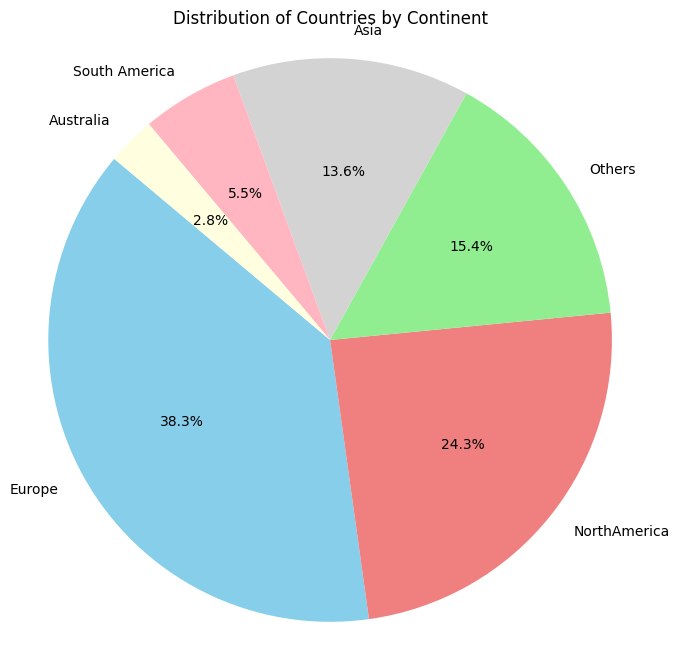

In [ ]:
continent_counts = df['Continent'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightgray', 'lightpink', 'lightyellow'])
plt.title('Distribution of Countries by Continent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()

#### 2.Bar Plots

Age Distribution

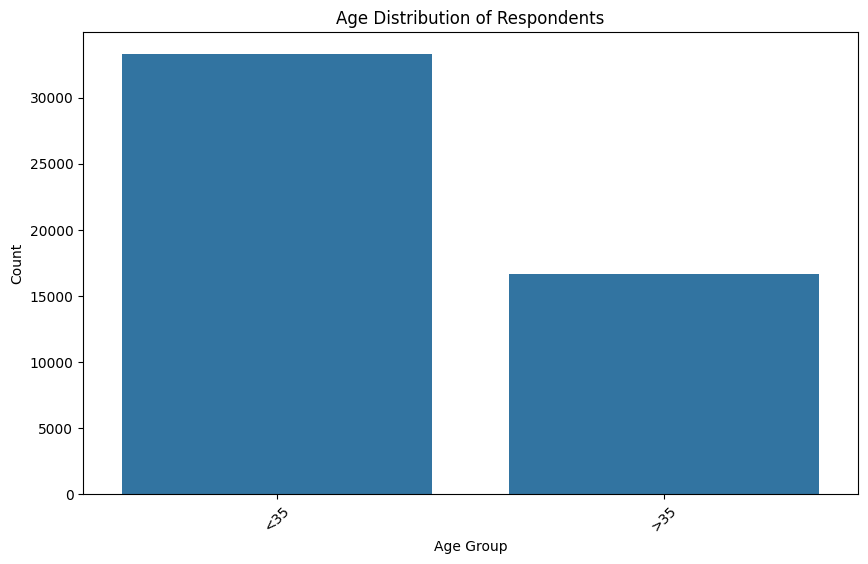

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', order=['<35', '>35'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution of Respondents')
plt.xticks(rotation=45)
plt.show()


Distribution of Education Levels

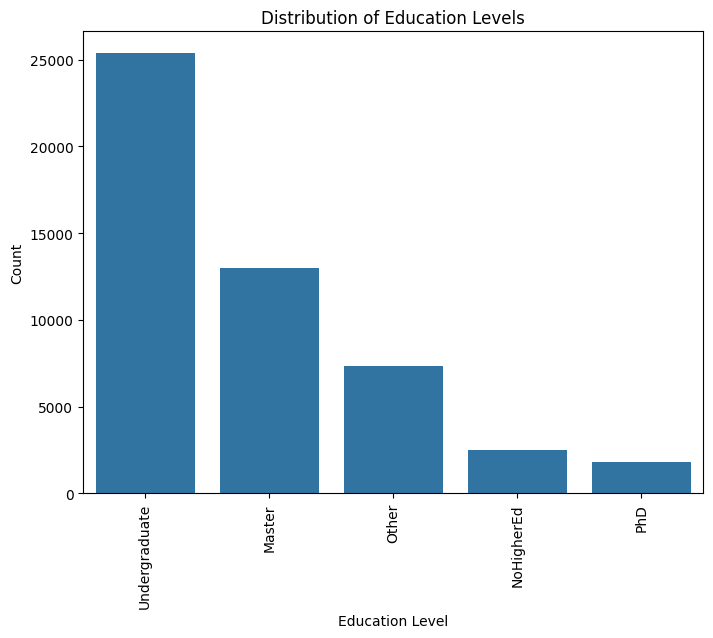

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EducationLevel', order=df['EducationLevel'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()

'Relationship Between Age and Employment Status'

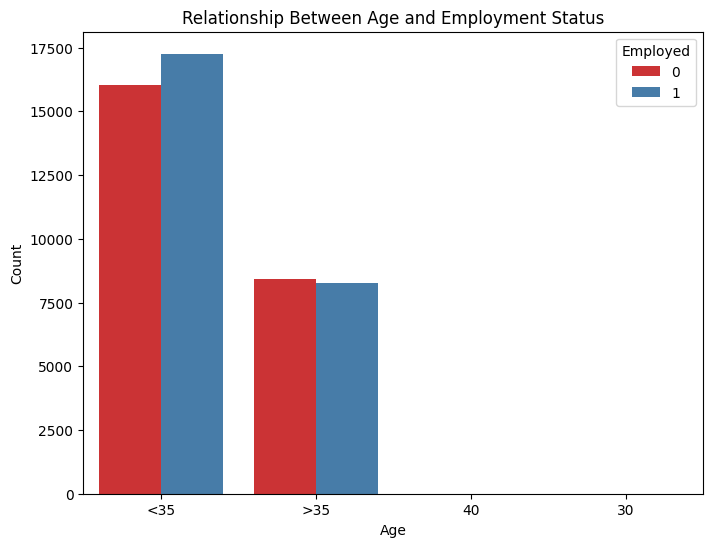

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age', hue='Employed', palette='Set1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Relationship Between Age and Employment Status')
plt.show()

Distribution of Countries by Continent


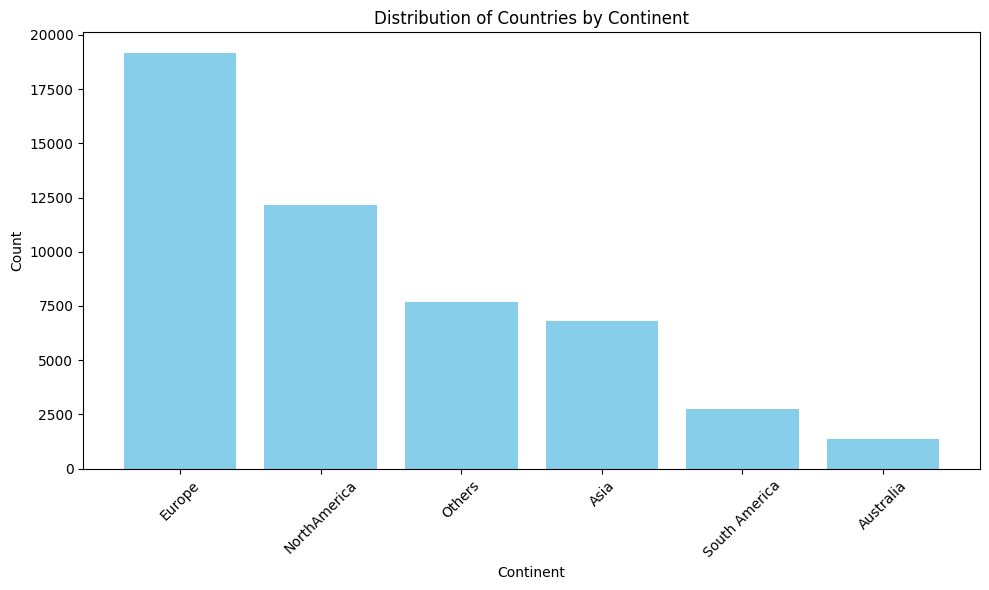

In [ ]:
continent_counts = df['Continent'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(continent_counts.index, continent_counts.values, color='skyblue')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Distribution of Countries by Continent')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

Distribution of Target variable "Employed"



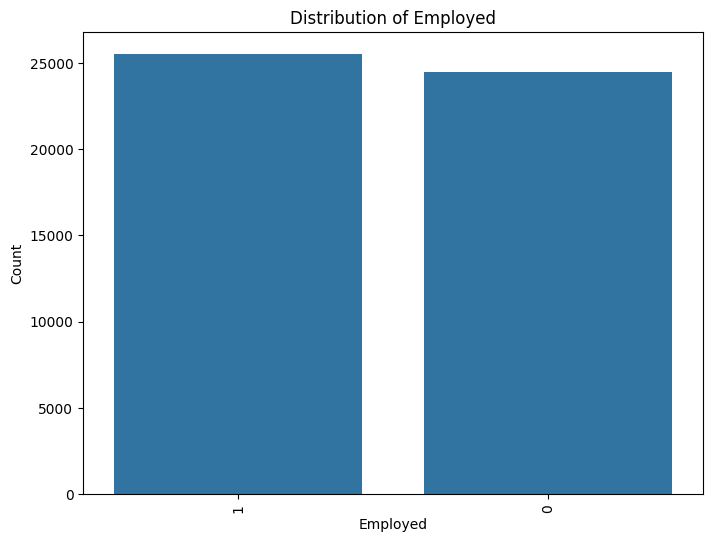

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Employed', order=df['Employed'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Employed')
plt.ylabel('Count')
plt.title('Distribution of Employed')
plt.show()

Average Previous Salary by Continent



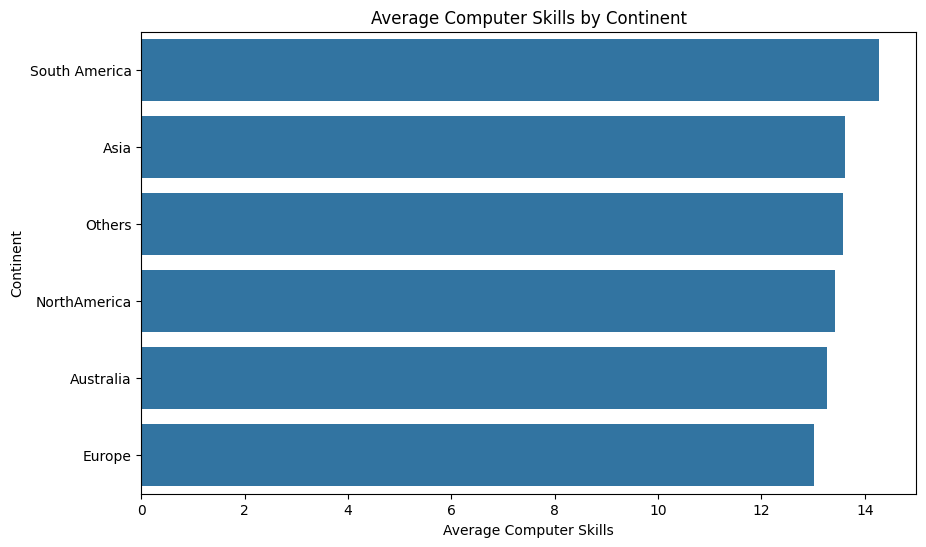

In [ ]:
# Group the data by 'Continent' and calculate the average 'ComputerSkills' for each continent
continent_computer_skills = df.groupby('Continent')['ComputerSkills'].mean().reset_index()

# Sort the data by average 'ComputerSkills' in descending order to show the highest skilled continents first
continent_computer_skills = continent_computer_skills.sort_values(by='ComputerSkills', ascending=False)

# Create a bar plot to visualize the average 'ComputerSkills' by continent
# Create a bar plot to visualize the average 'ComputerSkills' by continent
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_computer_skills, x='ComputerSkills', y='Continent')
plt.xlabel('Average Computer Skills')
plt.ylabel('Continent')
plt.title('Average Computer Skills by Continent')
plt.show()

Continents with Highest Employment Percentage

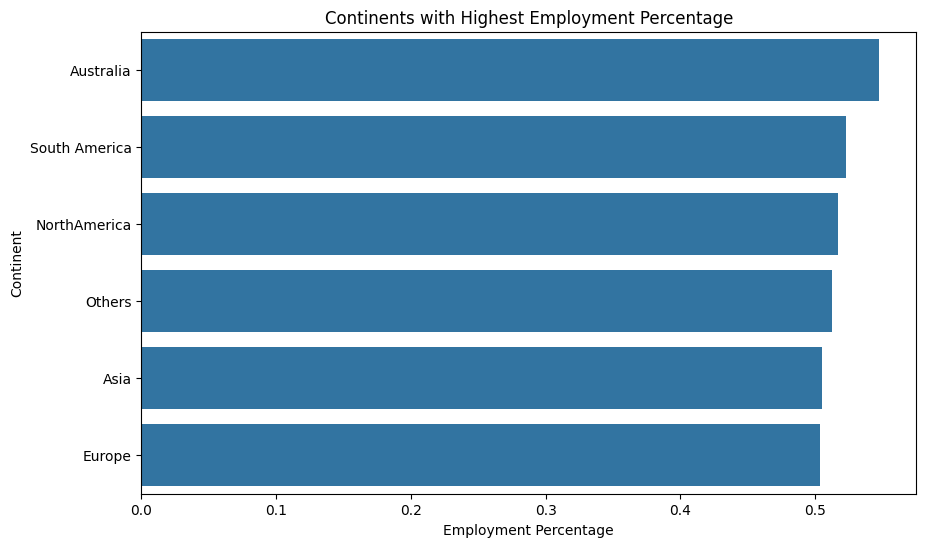

In [ ]:
# Calculate the employment percentage for each continent
continent_employment = df.groupby('Continent')['Employed'].mean().reset_index()

# Sort the data by employment percentage in descending order to show the highest percentages first
continent_employment = continent_employment.sort_values(by='Employed', ascending=False)

# Create a bar plot to visualize the employment percentage by continent
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_employment, x='Employed', y='Continent')
plt.xlabel('Employment Percentage')
plt.ylabel('Continent')
plt.title('Continents with Highest Employment Percentage')
plt.show()

## Data Preprocessing

###Encoding

In [ ]:
df.dtypes

,0
Age,object
Accessibility,object
EducationLevel,object
WorkedBefore,object
Gender,object
MentalHealth,object
MainBranch,object
YearsOfCoding,int64
YearsOfCodingWhileWorking,int64
Country,object


#### Create a copy

In [ ]:
df_copy = df.copy()

# Label encode categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['Age', 'Accessibility', 'EducationLevel','WorkedBefore','Gender', 'MentalHealth', 'MainBranch', 'Continent']
for col in categorical_columns:
    # Convert the column to string type before encoding
    df_copy[col] = df_copy[col].astype(str)
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

In [ ]:
df_copy.head()

,Age,Accessibility,EducationLevel,WorkedBefore,Gender,MentalHealth,MainBranch,YearsOfCoding,YearsOfCodingWhileWorking,Country,PreviousSalary,ComputerSkills,Skills,Employed,Continent
0,2,1,0,1,1,0,0,7,4,Sweden,51552.0,4,"C++, Python, PostgreSQL, Git",0,2
1,2,1,4,1,1,0,0,12,5,Spain,46482.0,12,"AWS, React.js, TypeScript, Node.js, Vue.js, HT...",1,2
2,2,1,0,1,1,0,0,15,6,Germany,77290.0,7,"Java, Ruby, Perl, C, C++, Ruby on Rails, Git",0,2
3,2,1,4,1,1,0,0,9,6,Canada,46135.0,13,"AWS, Ruby, MySQL, Laravel, Ruby on Rails, HTML...",0,3
4,3,1,3,0,1,0,1,40,30,Singapore,160932.0,2,"C++, Python",0,0


In [ ]:
df_copy['Continent'].value_counts()

,count
Continent,
2,19156
3,12171
4,7705
0,6813
5,2765
1,1386


#### Drop unneccasry Columns

In [ ]:
# Drop Country
df_copy.drop(columns = 'Skills', inplace=True)

In [ ]:
df_copy.drop(columns = 'Country', inplace=True)

### Rearrang features

In [ ]:

# Move the 'Employed' column to the end
columns = [col for col in df_copy.columns if col != 'Employed']  # Exclude 'Employed' column
columns.append('Employed')  # Add 'Employed' column at the end
df_copy = df_copy[columns]  # Reorder columns
# Display the updated DataFrame

In [ ]:
df_copy.head(10)

,Age,Accessibility,EducationLevel,WorkedBefore,Gender,MentalHealth,MainBranch,YearsOfCoding,YearsOfCodingWhileWorking,PreviousSalary,ComputerSkills,Continent,Employed
0,2,1,0,1,1,0,0,7,4,51552.0,4,2,0
1,2,1,4,1,1,0,0,12,5,46482.0,12,2,1
2,2,1,0,1,1,0,0,15,6,77290.0,7,2,0
3,2,1,4,1,1,0,0,9,6,46135.0,13,3,0
4,3,1,3,0,1,0,1,40,30,160932.0,2,0,0
5,2,1,0,1,1,0,0,9,2,38915.0,5,2,0
6,3,1,0,1,1,0,0,26,18,77831.0,17,2,1
7,2,1,0,1,1,0,1,14,5,81319.0,4,2,0
8,3,1,4,1,1,0,0,39,21,68507.0,3,2,0
9,3,1,0,1,1,0,0,20,16,37752.0,6,4,0


### Check for class imbalance and sampling, Remove outliers

In [ ]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return data

# Remove outliers in 'YearsCode', 'PreviousSalary,' and 'ComputerSkills'
df_copy = remove_outliers_iqr(df_copy, 'YearsOfCoding')
df_copy = remove_outliers_iqr(df_copy, 'PreviousSalary')
df_copy = remove_outliers_iqr(df_copy, 'ComputerSkills')

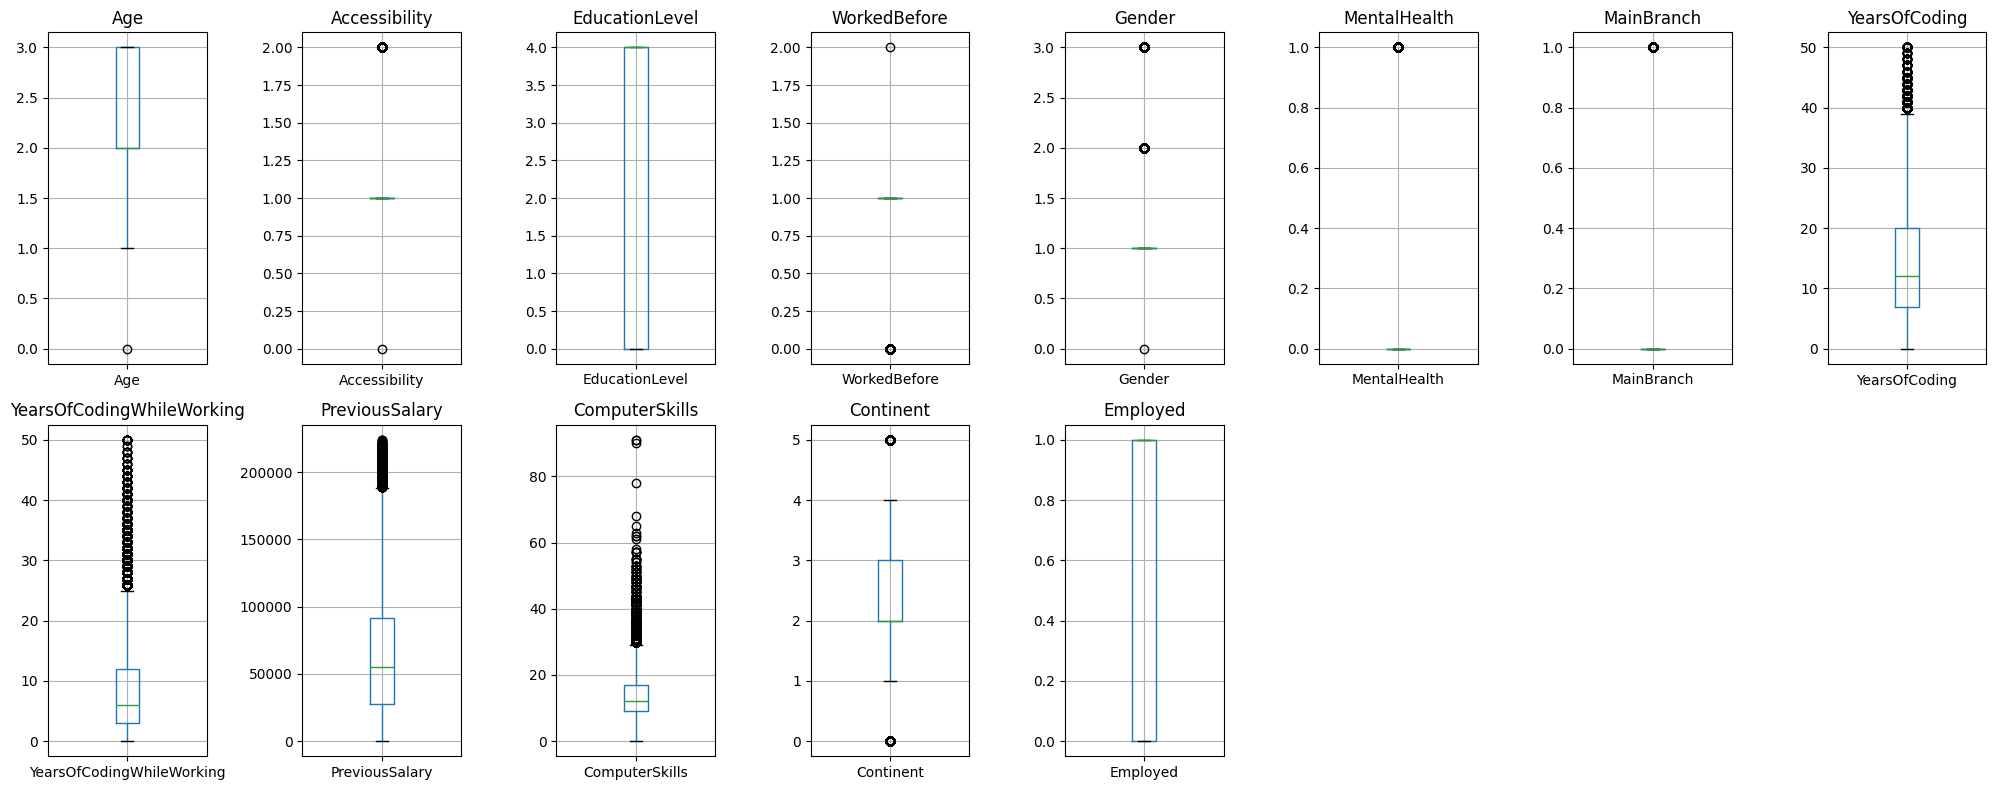

In [ ]:
#box plots
# Select numerical columns
numerical_columns = df_copy.select_dtypes(include=['int64', 'float64']).columns

# Create boxplots for numerical columns
plt.figure(figsize=(20, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2,8 , i)
    df_copy.boxplot(column=col)
    plt.title(col)
    plt.tight_layout()

plt.show()

## Comprehensive EDA

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_copy.corr()

In [ ]:
print(correlation_matrix)

                                Age  Accessibility  EducationLevel  \
Age                        1.000000       0.018359       -0.094110   
Accessibility              0.018359       1.000000        0.005924   
EducationLevel            -0.094110       0.005924        1.000000   
WorkedBefore              -0.065736      -0.015264        0.050555   
Gender                    -0.044401       0.029522        0.001354   
MentalHealth              -0.014269       0.103714        0.047818   
MainBranch                 0.086235       0.006004       -0.052246   
YearsOfCoding              0.685176       0.030664       -0.096731   
YearsOfCodingWhileWorking  0.697324       0.027562       -0.076516   
PreviousSalary             0.328743      -0.017866       -0.018549   
ComputerSkills            -0.051201       0.018911        0.035400   
Continent                  0.064727       0.020963       -0.004289   
Employed                  -0.021539       0.011660        0.043197   

                   

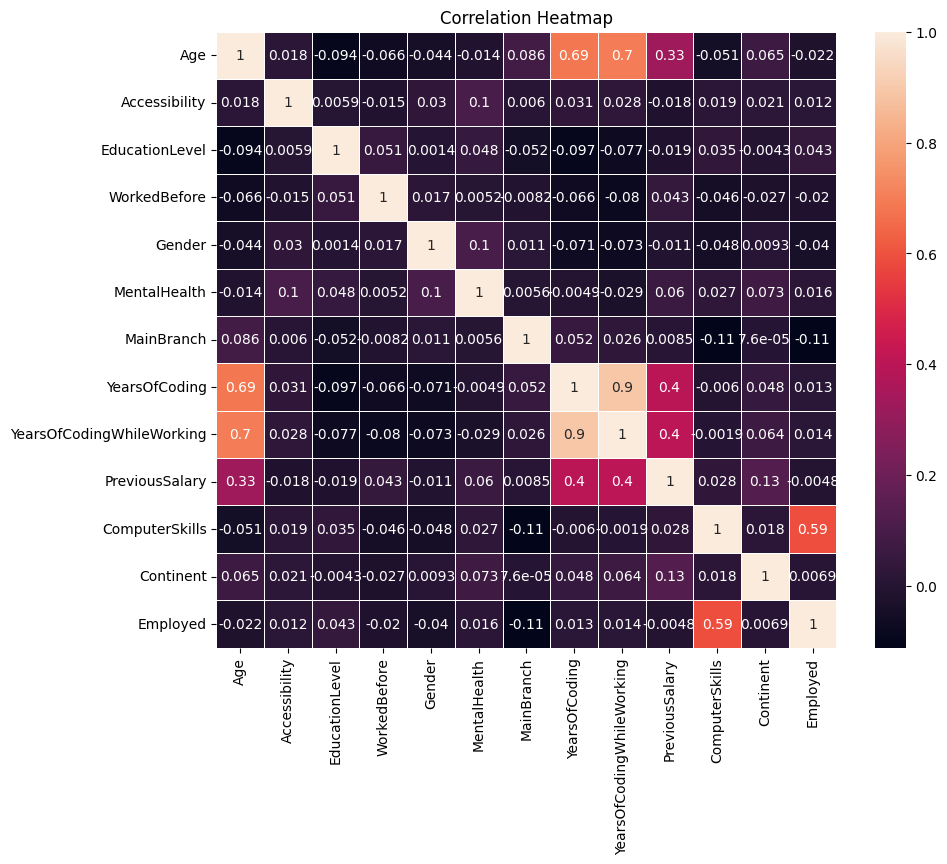

In [ ]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

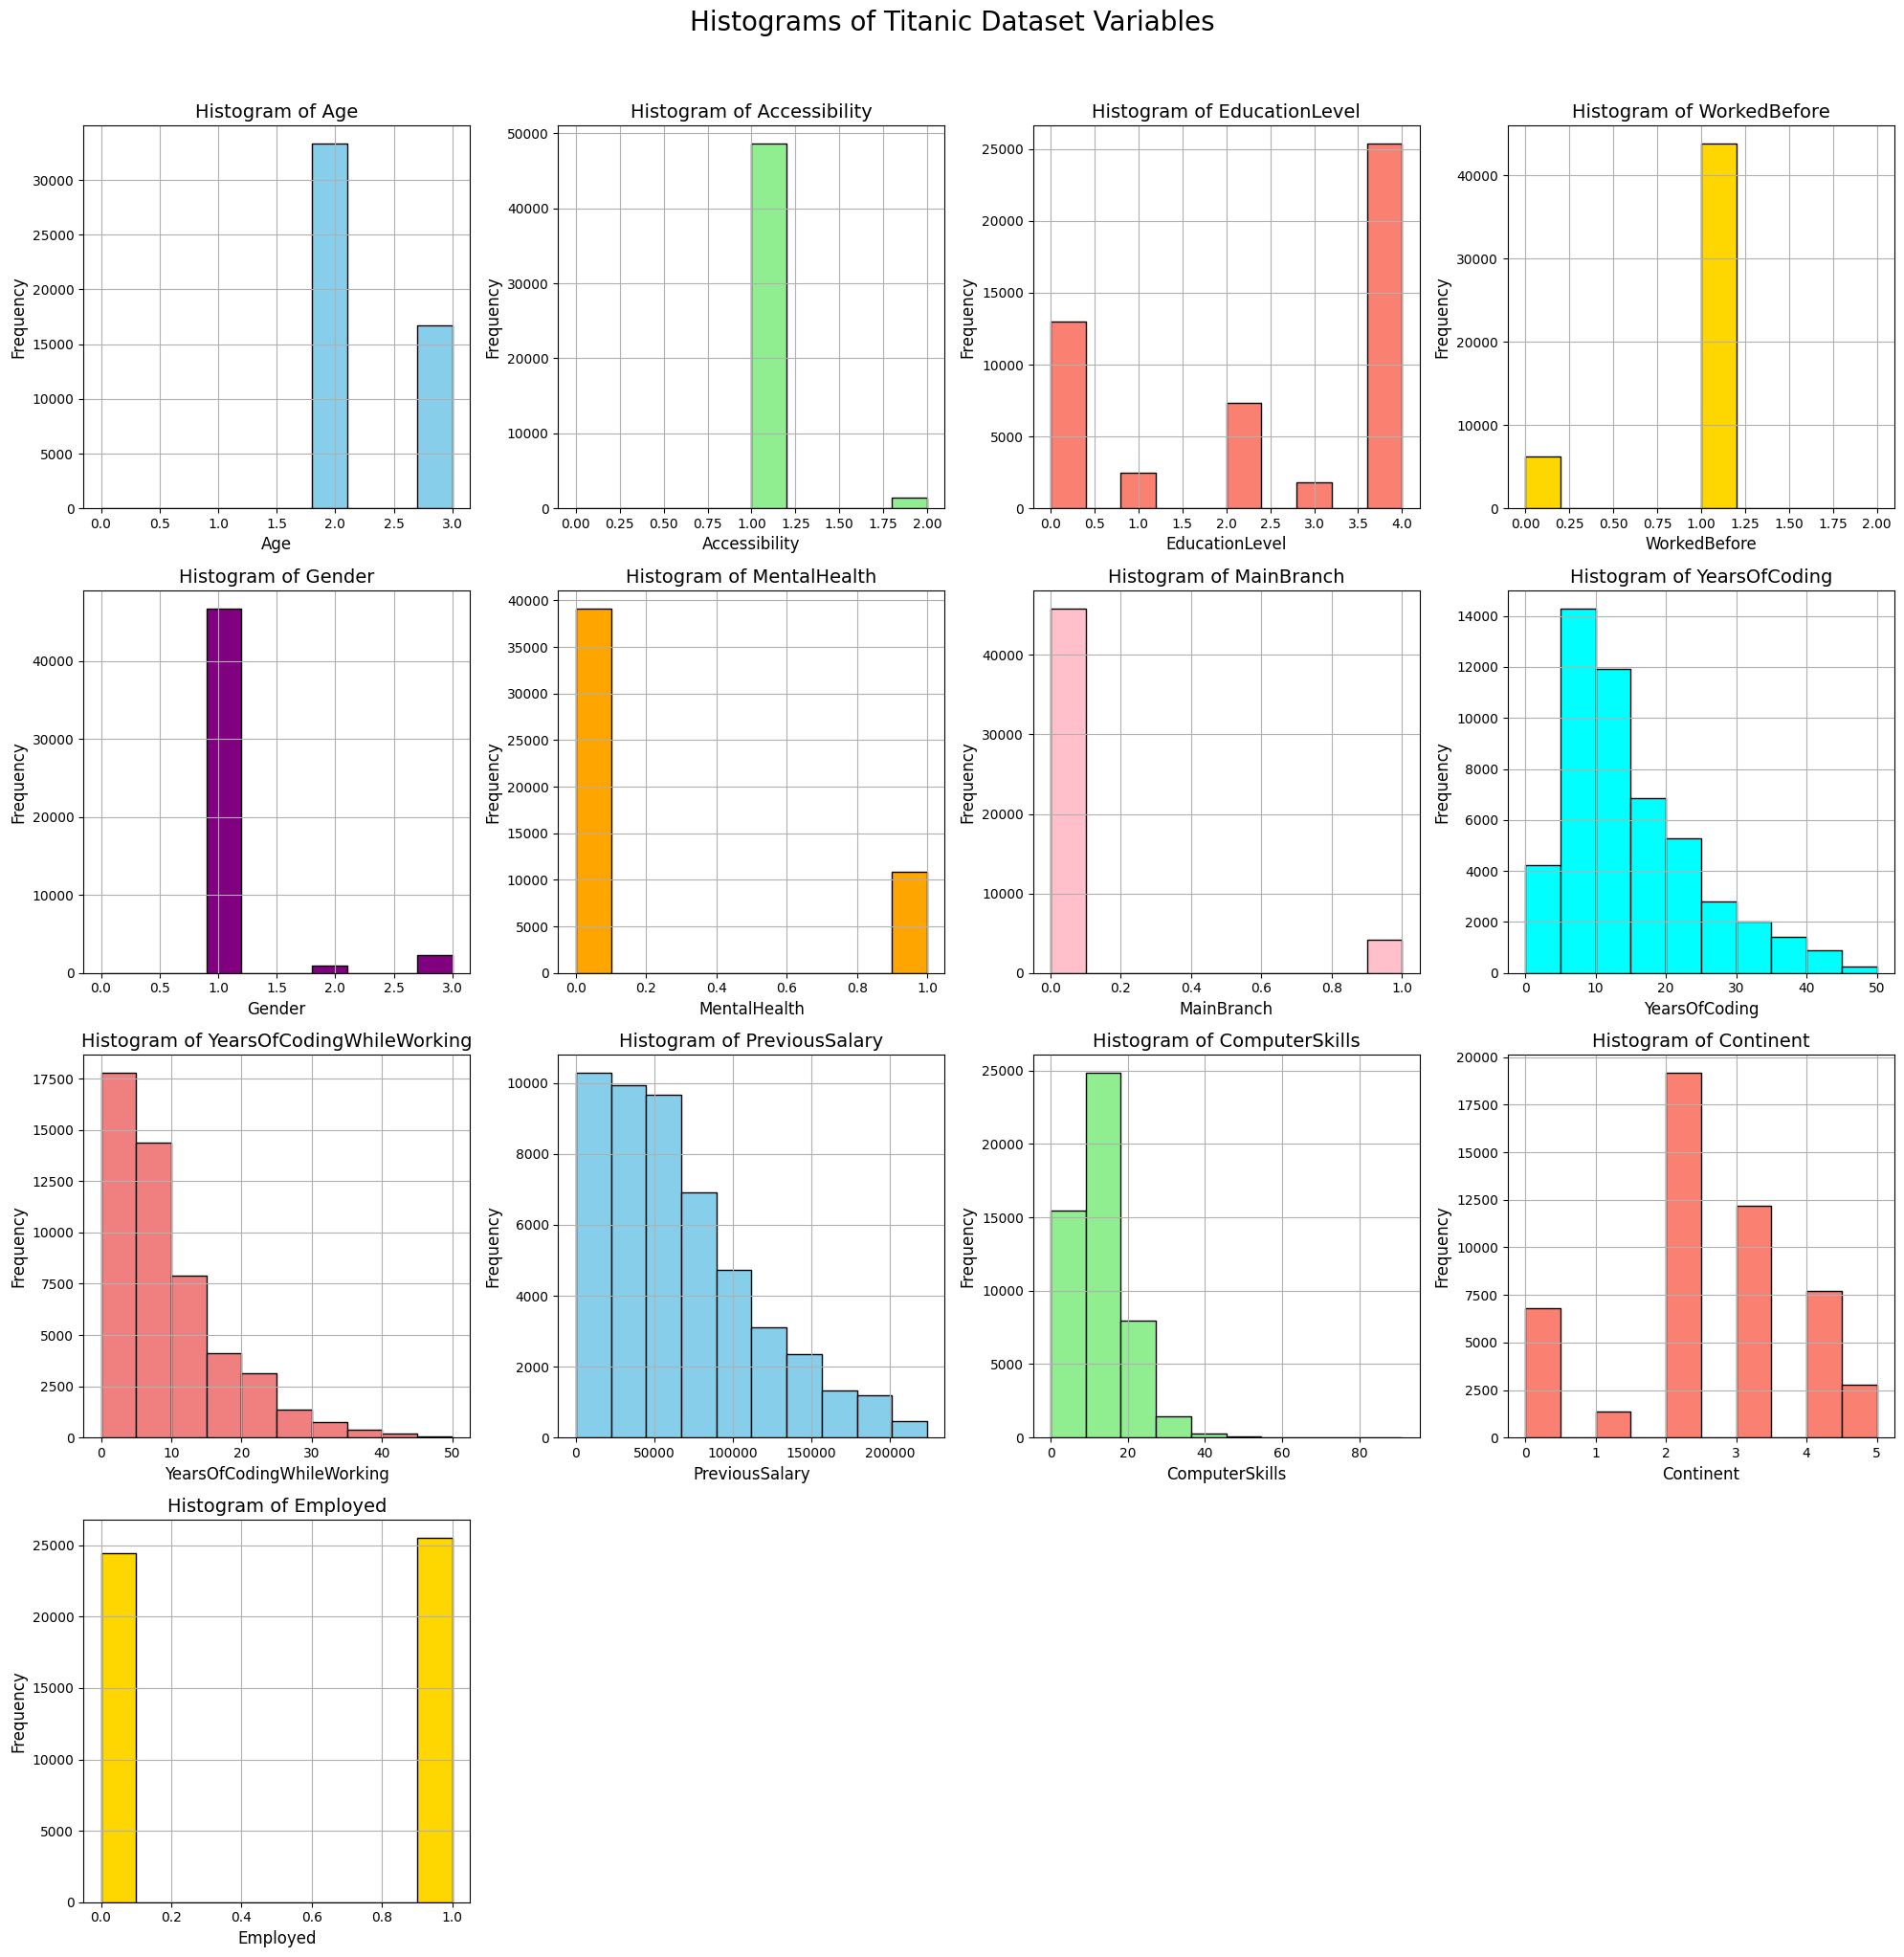

In [ ]:
# Adjust figure size for all plots
plt.rcParams['figure.figsize'] = (20, 15)

# Define a list of colors
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'purple', 'orange', 'pink', 'cyan', 'lightcoral']

# Plot histograms for all numerical columns with different colors
columns = df_copy.select_dtypes(include=['number']).columns
num_features = len(columns)

# Calculate grid size (number of rows and columns)
n_cols = 4  # Set the number of columns for the subplot grid
n_rows = (num_features // n_cols) + (num_features % n_cols > 0)  # Add extra row if necessary

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten axes for easy iteration

for idx, column in enumerate(columns):
    ax = axes[idx]  # Access subplot position
    df_copy[column].hist(bins=10, edgecolor='black', color=colors[idx % len(colors)], ax=ax)
    ax.set_title(f'Histogram of {column}', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

# Remove unused subplots if there are fewer than grid size
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# Add a title for the entire figure
plt.suptitle('Histograms of Titanic Dataset Variables', fontsize=20, y=1.02)

# Show the plot
plt.tight_layout()
plt.show()



## Models

### 1.Simple Logistic Regression

#### Create a train-test split

In [ ]:
"""# Step 1: Define features and target variable
X = df_copy.("Employed", axis=1)  # Features (all columns except 'Employed')
y = df_copy["Employed"]  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

-> Accuarcy=0.74
"""
"""
X = df_copy[['MainBranch','ComputerSkills']]  # Features [MainBranch,	ComputerSkills]
y = df_copy["Employed"]  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
-> Accuarcy=0.771
"""

X = df_copy[['ComputerSkills']]  # Features [ComputerSkills]
y = df_copy["Employed"]  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#-> Accuarcy=0.772


In [ ]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 37175
Testing set size: 9294


# MODEL FITTING

In [ ]:
from sklearn.metrics import roc_curve, auc # import roc_curve and auc

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

In [ ]:
# Evaluate the model
accuracy= accuracy_score(y_test,y_pred_lr)
class_report= classification_report(y_test,y_pred_lr)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(class_report)

Accuracy: 0.7727566171723693
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      4654
           1       0.78      0.76      0.77      4640

    accuracy                           0.77      9294
   macro avg       0.77      0.77      0.77      9294
weighted avg       0.77      0.77      0.77      9294



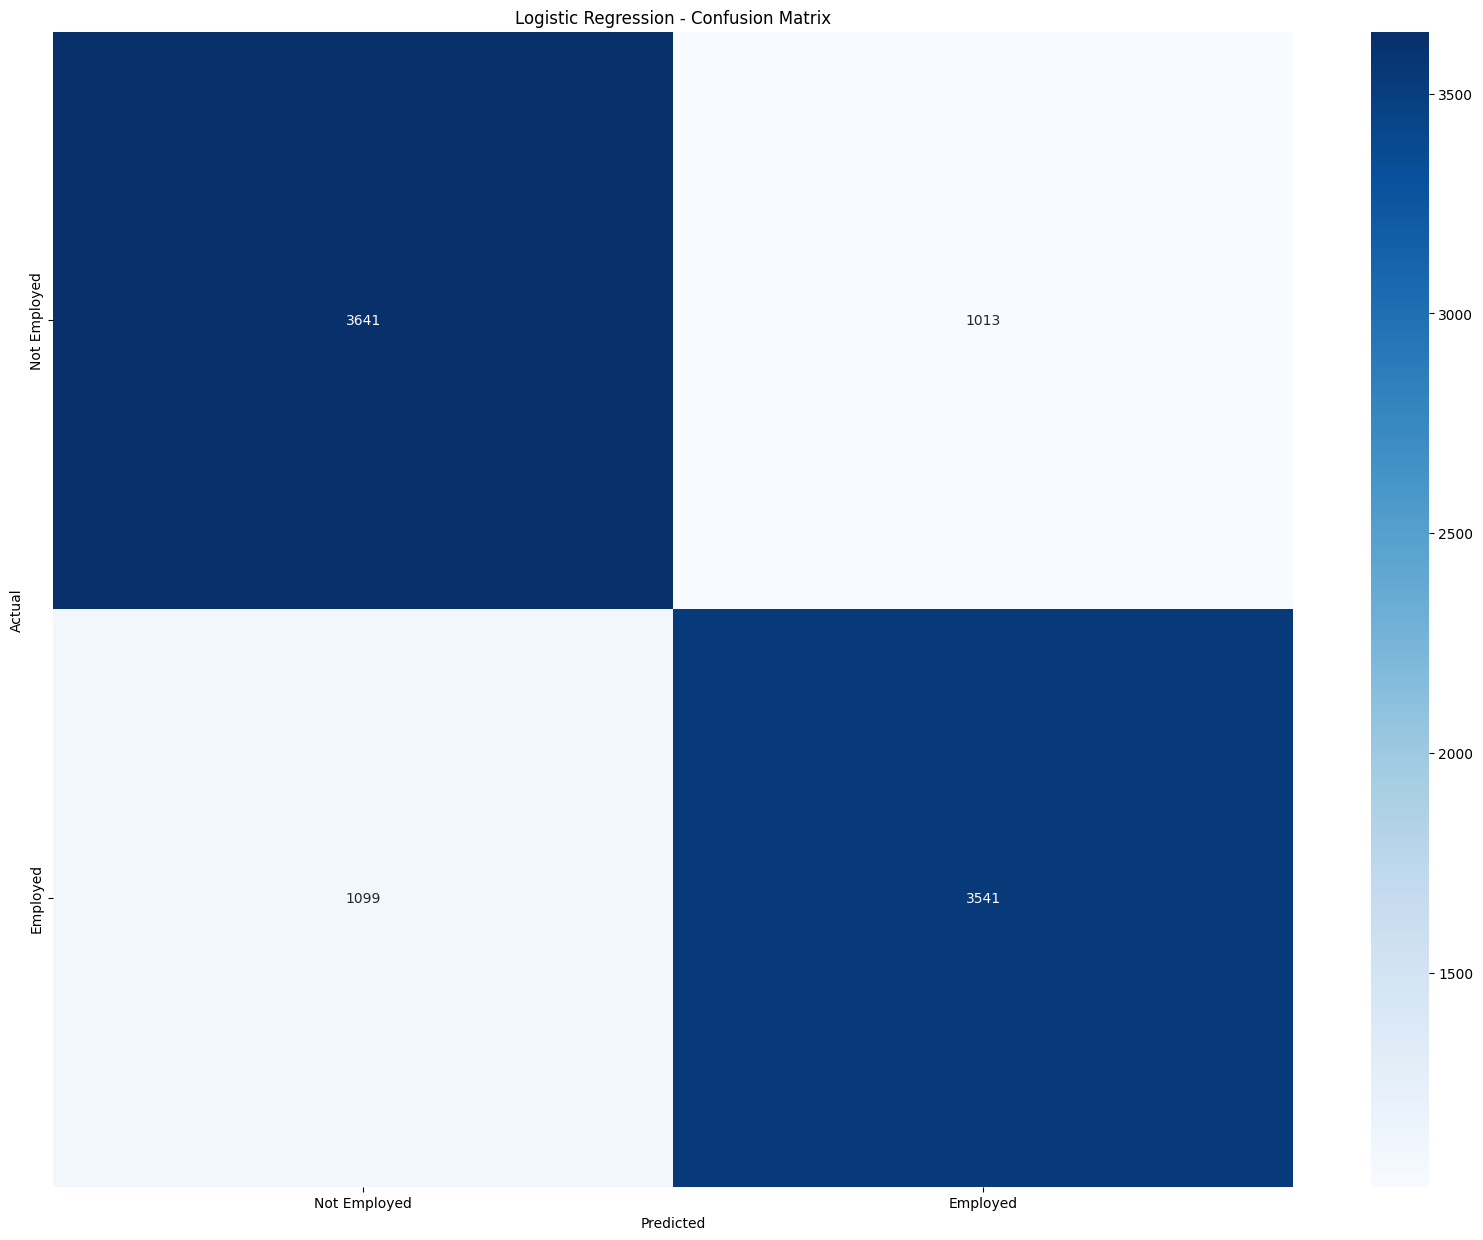

In [ ]:
# Plot the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure()
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

In [ ]:
# Calculate the AUC
y_scores_lr = logistic_regression.predict_proba(X_train)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, y_scores_lr)
auc_lr = auc(fpr_lr, tpr_lr)
# Print the AUC
print(f'Logistic Regression - AUC: {auc_lr:.4f}')

Logistic Regression - AUC: 0.8580


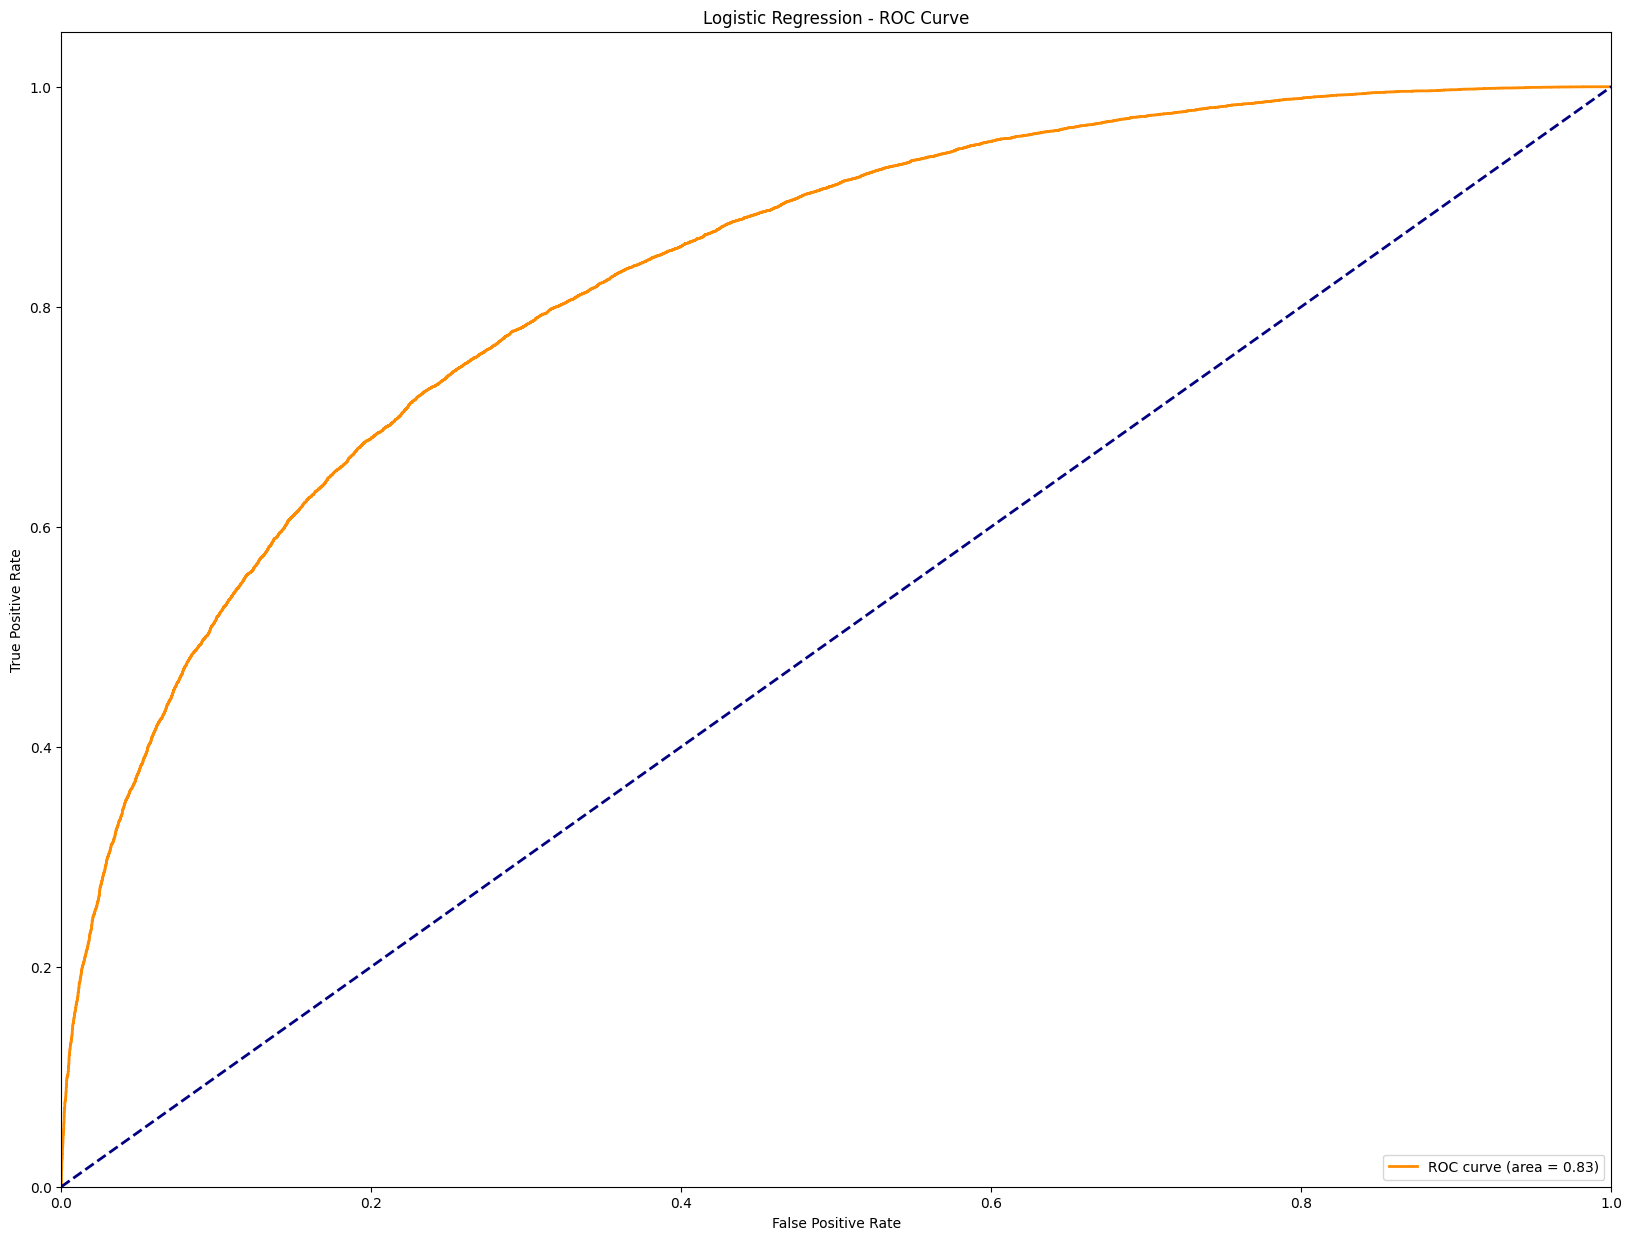

In [ ]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Export Data

In [ ]:
df_copy.to_csv('df_copy.csv', index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


from sklearn.ensemble import RandomForestClassifier

## Decision Tree Classifier

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
# Use the best hyperparameters to create and train the Decision Tree model
best_decision_tree = DecisionTreeClassifier(random_state=42, **best_params)
best_decision_tree.fit(X_train, y_train)

# Predict using the best Decision Tree model
y_pred_dt = best_decision_tree.predict(X_test)


In [ ]:
# Evaluate the model
accuracy_dt= accuracy_score(y_test,y_pred_dt)
class_report_dt= classification_report(y_test,y_pred_dt)

print(f'Accuracy: {accuracy_dt}')
print('Classification Report:')
print(class_report_dt)

Accuracy: 0.7730794060684313
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76      4654
           1       0.74      0.84      0.79      4640

    accuracy                           0.77      9294
   macro avg       0.78      0.77      0.77      9294
weighted avg       0.78      0.77      0.77      9294



In [ ]:
# Calculate the AUC
y_scores_dt = best_decision_tree.predict_proba(X_train)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_scores_dt)
auc_dt = auc(fpr_dt, tpr_dt)

In [ ]:
print(auc_dt)

0.8580393066594811


In [ ]:
# Print the best hyperparameters and AUC
print(f'Best Hyperparameters for Decision Tree: {best_params}')
print(f'Decision Tree - AUC with Best Hyperparameters: {auc_dt:.4f}')

Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree - AUC with Best Hyperparameters: 0.8580


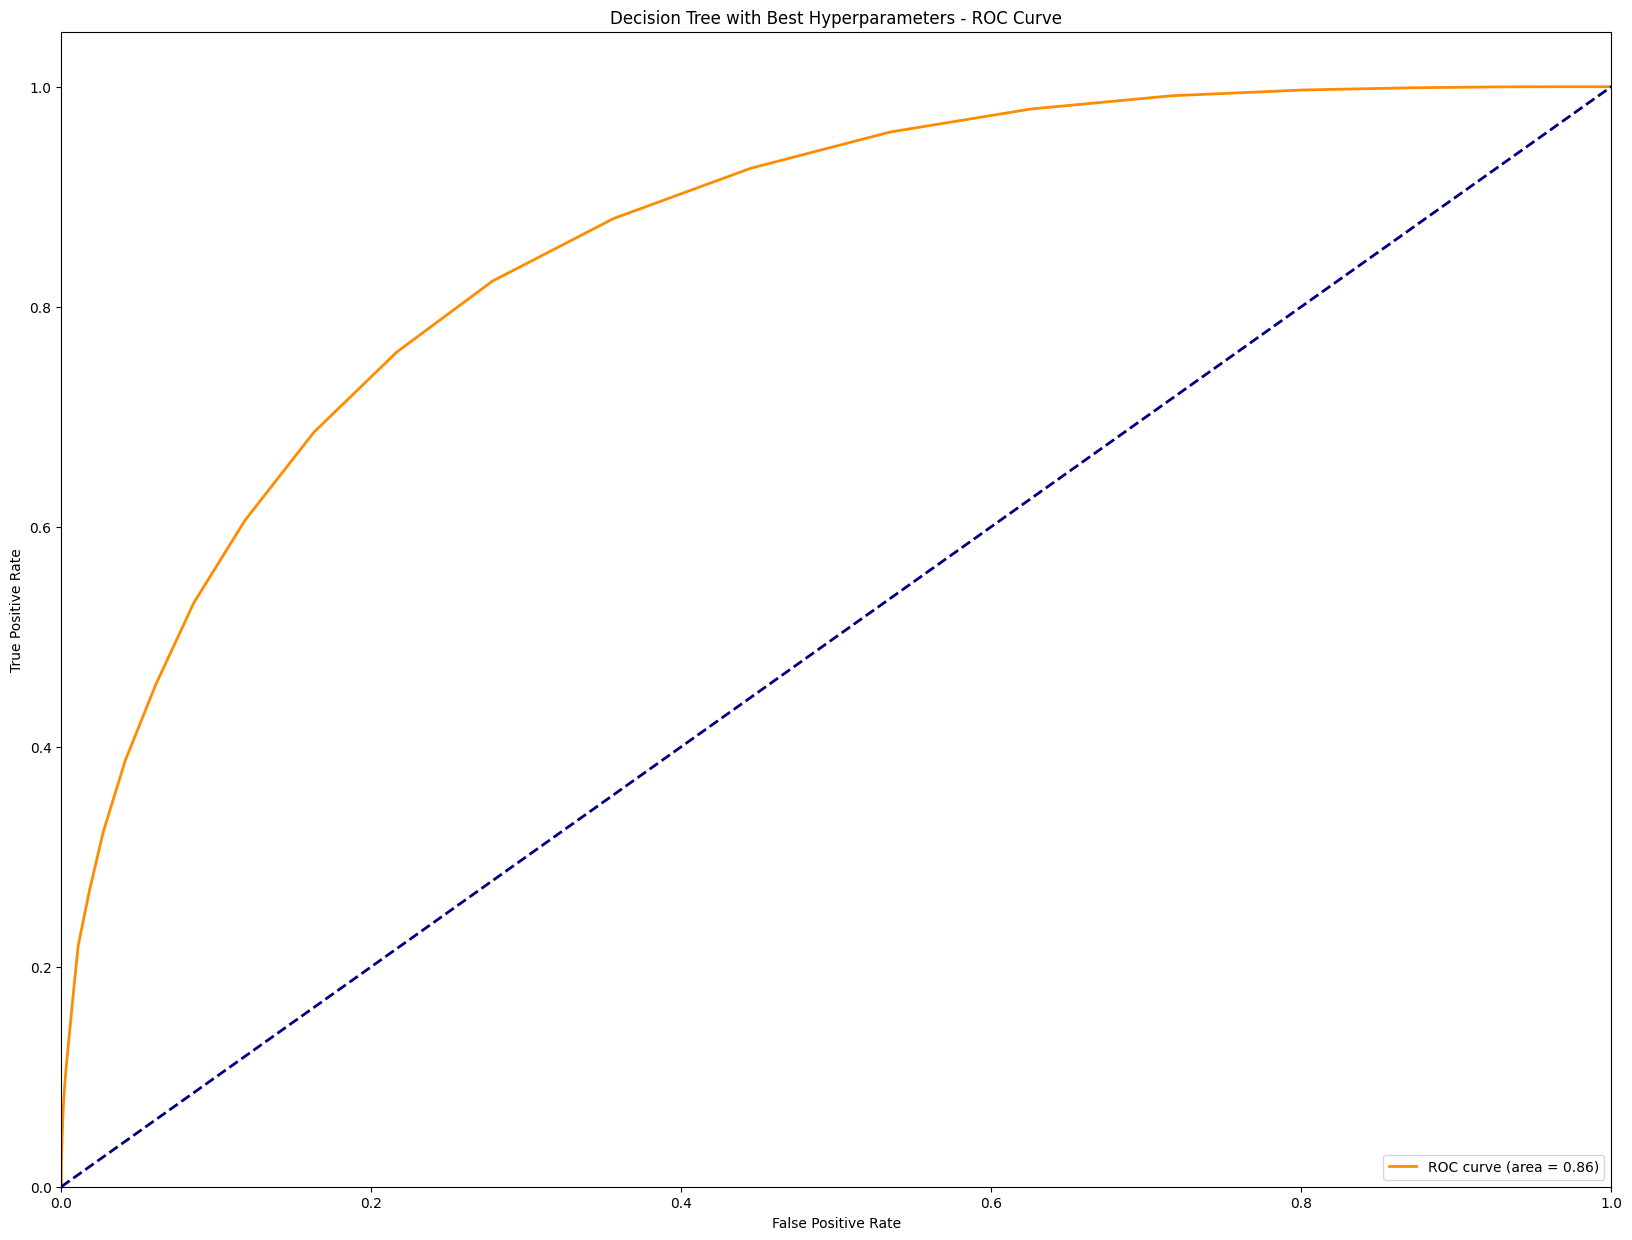

In [ ]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree with Best Hyperparameters - ROC Curve')
plt.legend(loc='lower right')
plt.show()

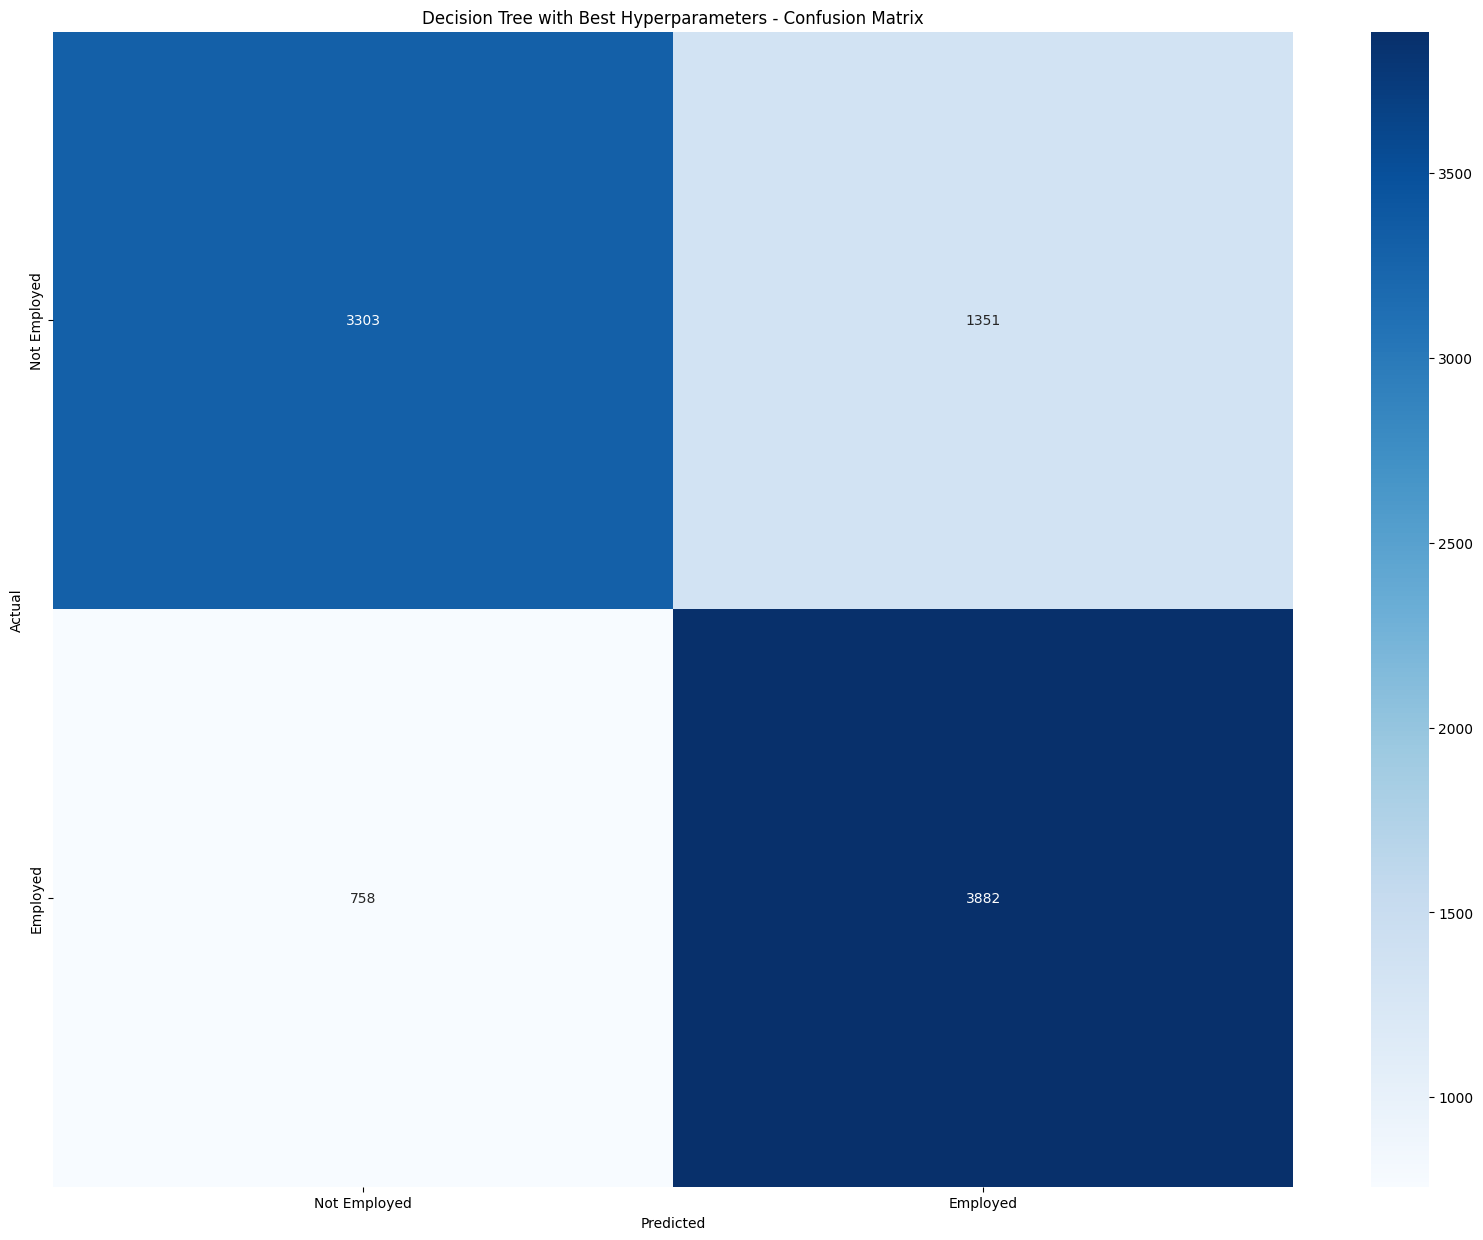

In [ ]:
# Plot the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure()
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree with Best Hyperparameters - Confusion Matrix')
plt.show()

In [ ]:
print('F-1 Score : ',(f1_score(y_test, y_pred_dt, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_dt, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_dt, average='micro')))

F-1 Score :  0.7730794060684313
Precision Score :  0.7730794060684313
Recall Score :  0.7730794060684313


# **Random Forest Classifier**

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [ ]:
# Use the best hyperparameters to create and train the Random Forest model
best_random_forest = RandomForestClassifier(random_state=42, **best_params)
best_random_forest.fit(X_train, y_train)

# Predict using the best Random Forest model
y_pred_rf = best_random_forest.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_rf= accuracy_score(y_test,y_pred_rf)
class_report_rf= classification_report(y_test,y_pred_rf)

print(f'Accuracy: {accuracy_rf}')
print('Classification Report:')
print(class_report_rf)

Accuracy: 0.7730794060684313
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76      4654
           1       0.74      0.84      0.79      4640

    accuracy                           0.77      9294
   macro avg       0.78      0.77      0.77      9294
weighted avg       0.78      0.77      0.77      9294



In [ ]:
# Calculate the AUC
y_scores_rf = best_random_forest.predict_proba(X_train)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_scores_rf)
auc_rf = auc(fpr_rf, tpr_rf)

In [ ]:
# Print the best hyperparameters and AUC
print(f'Best Hyperparameters: {best_params}')
print(f'Random Forest - AUC with Best Hyperparameters: {auc_rf:.4f}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - AUC with Best Hyperparameters: 0.8580


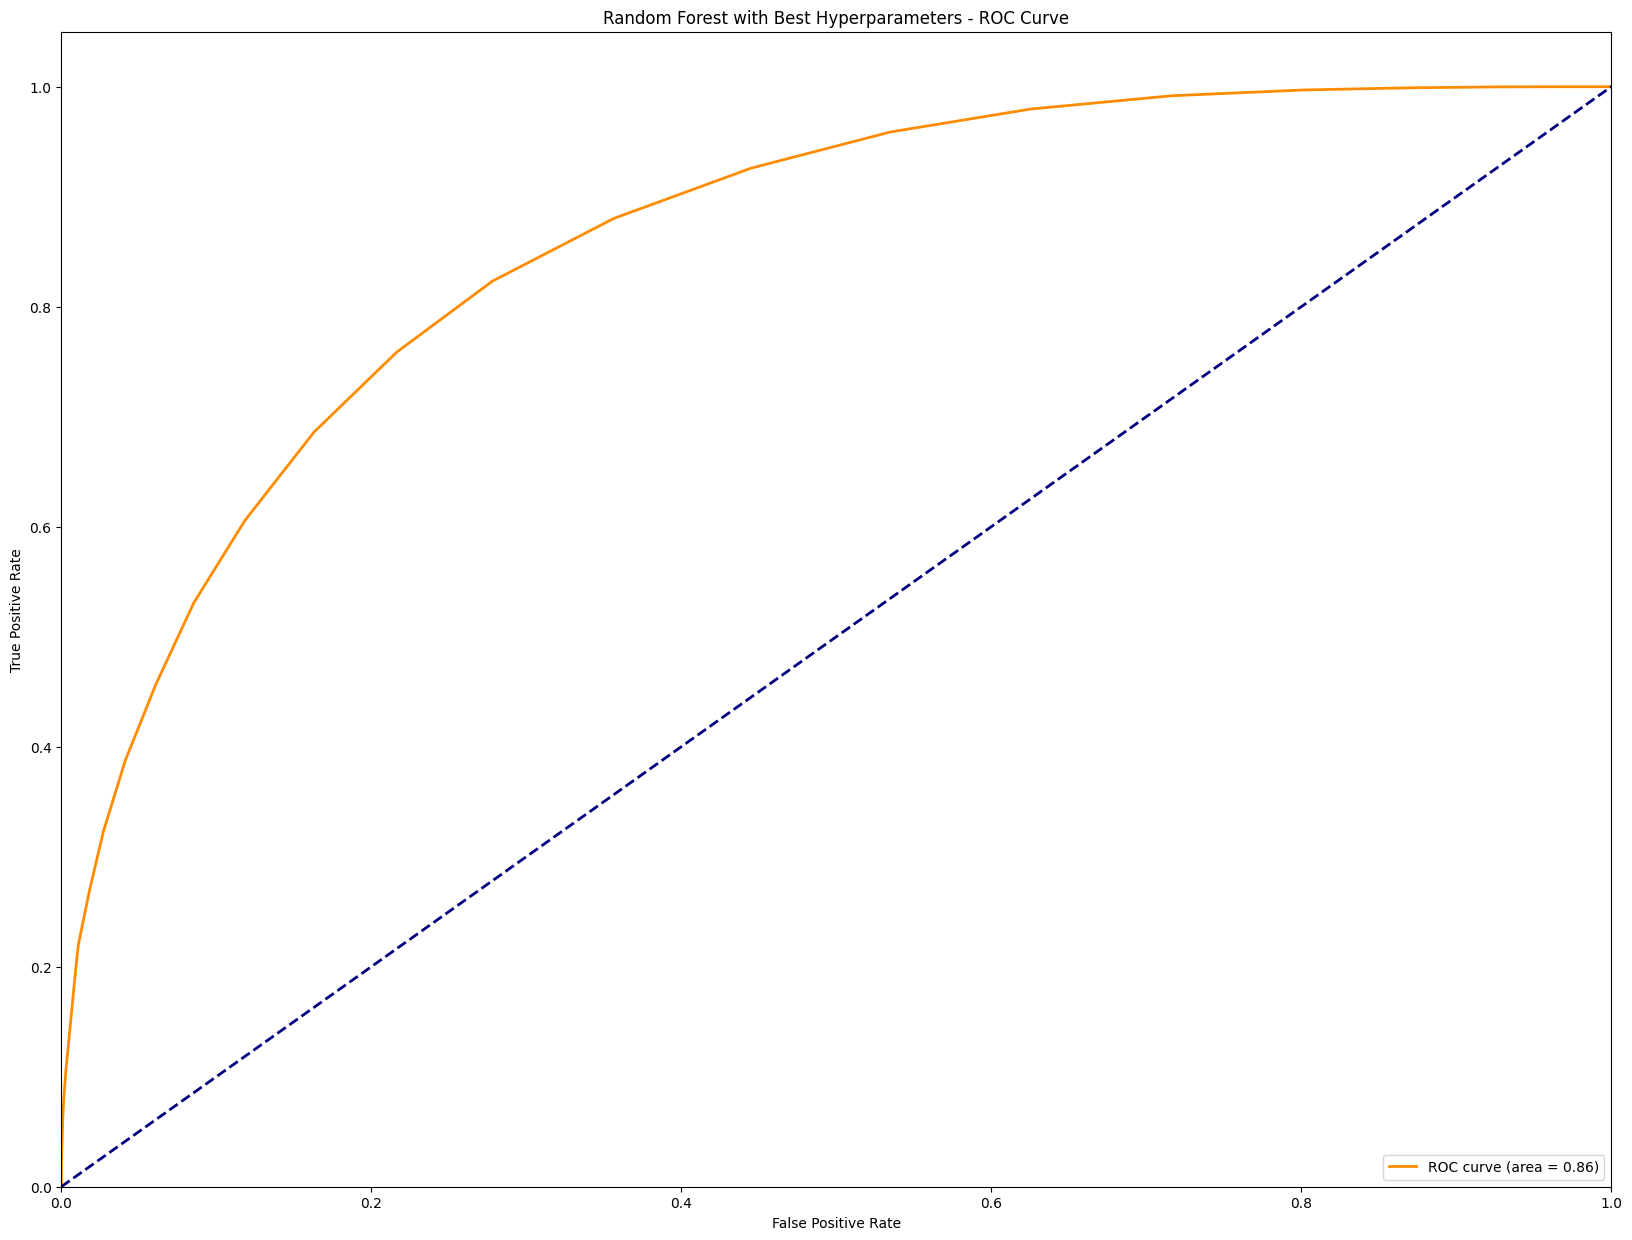

In [ ]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with Best Hyperparameters - ROC Curve')
plt.legend(loc='lower right')
plt.show()

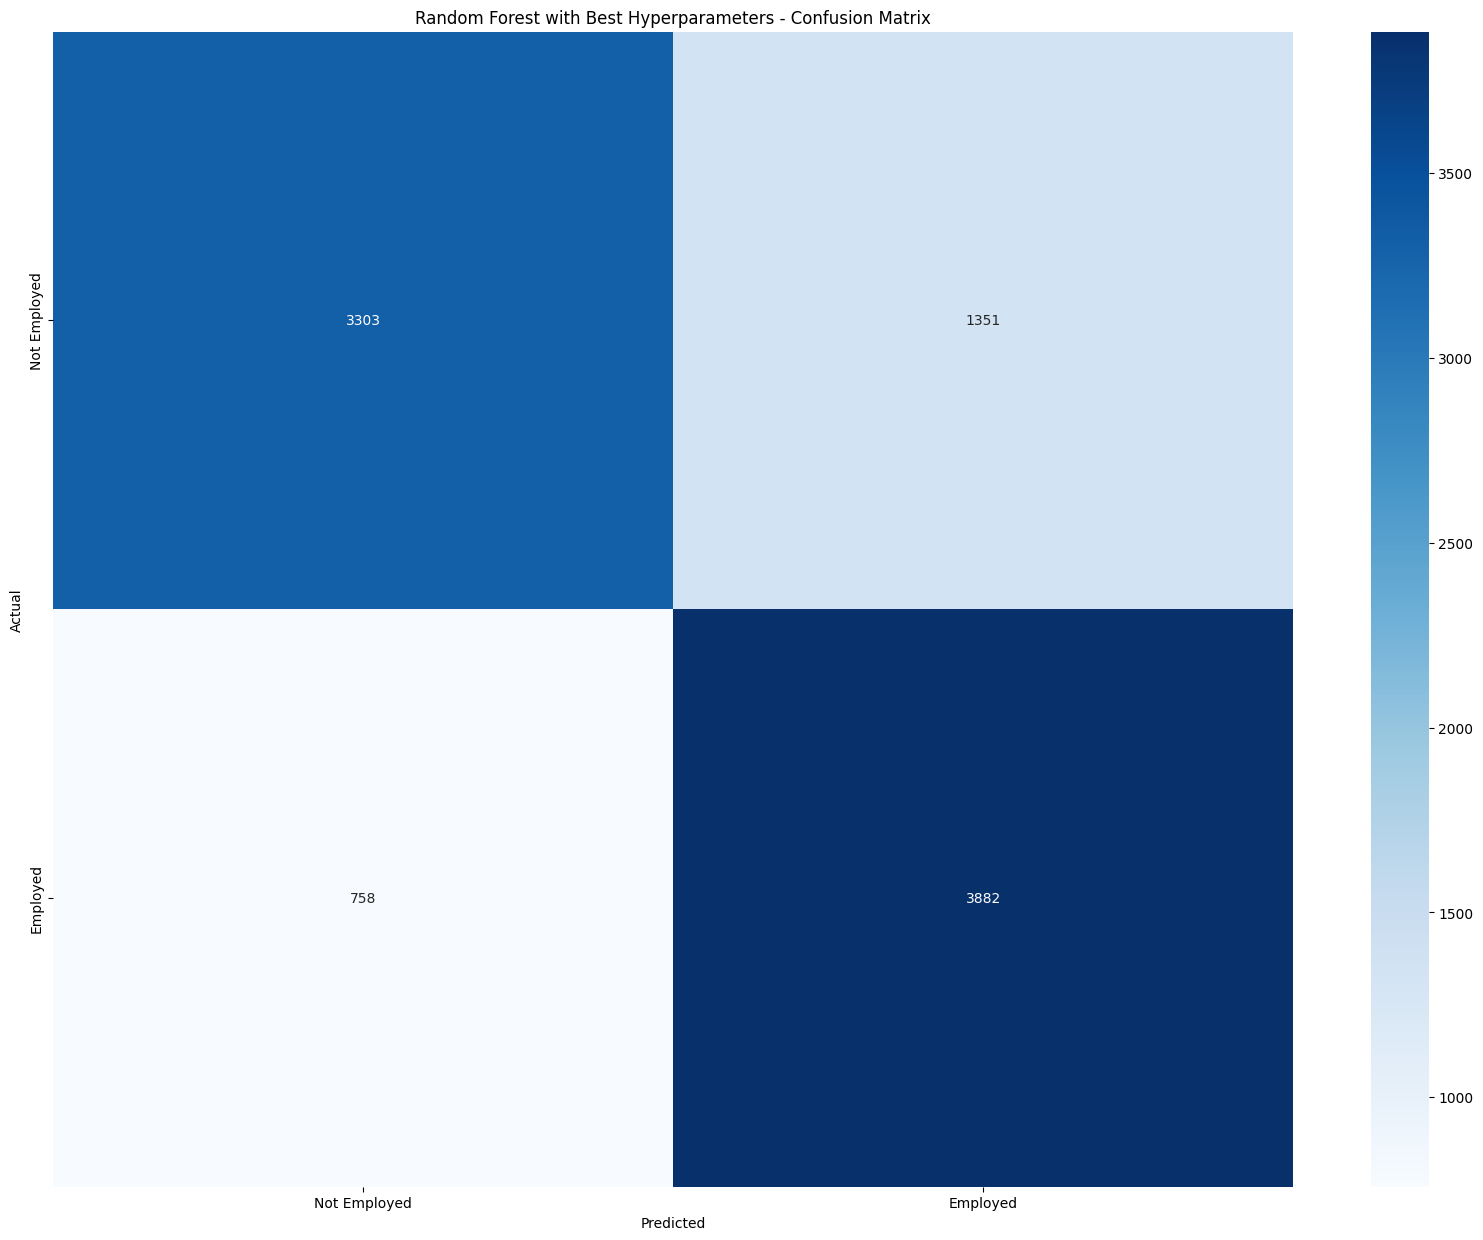

In [ ]:
# Plot the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure()
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest with Best Hyperparameters - Confusion Matrix')
plt.show()

In [ ]:
print('F-1 Score : ',(f1_score(y_test, y_pred_rf, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_rf, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_rf, average='micro')))

F-1 Score :  0.7730794060684313
Precision Score :  0.7730794060684313
Recall Score :  0.7730794060684313


# Hello, my teammate 😊!
Please write your name here and let's start coding ✍️.

In [ ]:
import sqlite3
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate  # Import tabulate library
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize database and load CSV
def initialize_database():
    con = sqlite3.connect('HR.db')
    cur = con.cursor()

    # Create table
    cur.execute("""
        CREATE TABLE IF NOT EXISTS EmployeesRecords (
            ID INTEGER PRIMARY KEY AUTOINCREMENT,
            Age INTEGER,
            Accessibility INTEGER,
            EducationLevel TEXT,
            Gender TEXT,
            WorkedBefore INTEGER,
            MentalHealth TEXT,
            MainBranch TEXT,
            YearsOfCoding INTEGER,
            YearsOfCodingWhileWorking INTEGER,
            Country TEXT,
            PreviousSalary REAL,
            HaveWorkedWith TEXT,
            ComputerSkills INTEGER,
            Employed INTEGER
        );
    """)

    # Import CSV
    with open("stackoverflow_full .csv", 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)  # Skip the header row
        rows_to_insert = []
        for count, row in enumerate(reader):
            if count >= 50000:  # Limit to 50,000 rows
                break
            rows_to_insert.append(row[1:])  # Skip the first column (assuming it's an ID column)
        cur.executemany(f"""
            INSERT INTO EmployeesRecords (
                Age, Accessibility, EducationLevel, Gender, WorkedBefore, MentalHealth,
                MainBranch, YearsOfCoding, YearsOfCodingWhileWorking, Country, PreviousSalary,
                HaveWorkedWith, ComputerSkills, Employed
            )
            VALUES ({','.join(['?'] * (len(headers) - 1))});
        """, rows_to_insert)

    con.commit()
    con.close()
    print("Database initialized and CSV data imported successfully!")

# Retrieve Data from DB to DataFrame for EDA
def load_data_to_df():
    con = sqlite3.connect('HR.db')
    df = pd.read_sql_query("SELECT * FROM EmployeesRecords", con)
    con.close()
    return df

# Pretty-print DataFrame as a table
def print_pretty_table(df):
    print("\n" + tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))

# EDA & Data Preprocessing
def perform_eda_and_preprocessing(df):
    print("\n--- EDA & Data Preprocessing ---")

    # Checking for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Dropping duplicate rows
    print("\nDropping duplicates...")
    df = df.drop_duplicates()

    # Encoding categorical variables
    label_encoder = LabelEncoder()
    categorical_columns = ['Age', 'Accessibility', 'EducationLevel', 'WorkedBefore', 'Gender', 'MentalHealth', 'MainBranch', 'Country']

    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))

    # Handle outliers (IQR method)
    def remove_outliers_iqr(data, column_name):
        Q1 = data[column_name].quantile(0.25)
        Q3 = data[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
        return data

    # Remove outliers
    for col in ['YearsOfCoding', 'PreviousSalary', 'ComputerSkills']:
        df = remove_outliers_iqr(df, col)

    # Feature and target selection
    X = df[['Age', 'Accessibility', 'ComputerSkills', 'PreviousSalary']]
    y = df['Employed']

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\nEDA and Preprocessing complete.")
    return X_train, X_test, y_train, y_test

# Train the models and print results
def train_models(X_train, X_test, y_train, y_test):
    print("\n--- Training Models ---")

    # Logistic Regression
    logistic_regression = LogisticRegression(max_iter=1000)
    logistic_regression.fit(X_train, y_train)
    y_pred_lr = logistic_regression.predict(X_test)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

    # Decision Tree
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    y_pred_dt = decision_tree.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

    # Random Forest
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)
    y_pred_rf = random_forest.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

    # Store models in a dictionary and return
    models = {
        'Logistic Regression': logistic_regression,
        'Decision Tree': decision_tree,
        'Random Forest': random_forest
    }
    return models

# AI-Powered HR Mode: Model selection and prediction
def ai_hr_mode(models):
    print("\n--- AI-Powered HR Mode ---")
    print("Available Models:")
    for i, model_name in enumerate(models.keys(), start=1):
        print(f"{i}. {model_name}")
    choice = int(input("Select a model by number: "))
    model_name = list(models.keys())[choice - 1]
    model = models[model_name]
    print(f"Using {model_name} for predictions")

    # Get input for prediction
    age = int(input("Age: "))
    accessibility = int(input("Accessibility (1 or 0): "))
    computer_skills = int(input("Computer Skills Level (1-10): "))
    previous_salary = float(input("Previous Salary: "))

    # Create a DataFrame for prediction with the same column names as the training data
    input_data = pd.DataFrame([[age, accessibility, computer_skills, previous_salary]],
                              columns=['Age', 'Accessibility', 'ComputerSkills', 'PreviousSalary'])

    # Predict
    prediction = model.predict(input_data)[0]
    print(f"Prediction Result: {'Accepted' if prediction == 1 else 'Rejected'}")

# Manual HR Mode - Retrieve number of head rows
def retrieve_head_rows():
    con = sqlite3.connect('HR.db')
    df = pd.read_sql_query("SELECT * FROM EmployeesRecords", con)
    con.close()

    num_rows = int(input("Enter the number of rows you want to retrieve: "))
    print(f"\nFirst {num_rows} rows from the database:")
    print_pretty_table(df.head(num_rows))  # Pretty print the head rows

# Main function to interact with user
def main():
    models = {}  # To store trained models and avoid retraining
    while True:
        print("\n1. Manual HR Mode")
        print("2. AI-Powered HR Mode")
        print("3. Train Models")
        print("4. Exit")
        choice = int(input("Enter your choice: "))

        if choice == 1:
            print("\nManual HR Mode")
            print("1. Add Employee")
            print("2. Retrieve Employee")
            print("3. Delete Employee")
            print("4. Update Employee")
            print("5. Retrieve Head Rows from DB")  # New option
            manual_choice = int(input("Enter your choice: "))
            if manual_choice == 1:
                add_employee()
            elif manual_choice == 2:
                retrieve_employee()
            elif manual_choice == 3:
                delete_employee()
            elif manual_choice == 4:
                update_employee()
            elif manual_choice == 5:
                retrieve_head_rows()  # New option action
            else:
                print("Invalid choice!")

        elif choice == 2:
            if not models:  # If models haven't been trained yet
                print("Please train the models first (Option 3)!")
            else:
                # AI Mode - Using pre-trained models
                ai_hr_mode(models)

        elif choice == 3:
            # Load data to DataFrame and train models only once
            df = load_data_to_df()
            X_train, X_test, y_train, y_test = perform_eda_and_preprocessing(df)
            models = train_models(X_train, X_test, y_train, y_test)

        elif choice == 4:
            print("Exiting the program.")
            break
        else:
            print("Invalid choice!")

if __name__ == "__main__":
    main()



1. Manual HR Mode
2. AI-Powered HR Mode
3. Train Models
4. Exit
Enter your choice: 1

Manual HR Mode
1. Add Employee
2. Retrieve Employee
3. Delete Employee
4. Update Employee
5. Retrieve Head Rows from DB
Enter your choice: 5


DatabaseError: Execution failed on sql 'SELECT * FROM EmployeesRecords': no such table: EmployeesRecords

In [ ]:
import sqlite3
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate  # Import tabulate library
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize database and load CSV
def initialize_database():
    con = sqlite3.connect('HR.db')
    cur = con.cursor()

    # Create table
    cur.execute("""
        CREATE TABLE IF NOT EXISTS EmployeesRecords (
            ID INTEGER PRIMARY KEY AUTOINCREMENT,
            Age INTEGER,
            Accessibility INTEGER,
            EducationLevel TEXT,
            Gender TEXT,
            WorkedBefore INTEGER,
            MentalHealth TEXT,
            MainBranch TEXT,
            YearsOfCoding INTEGER,
            YearsOfCodingWhileWorking INTEGER,
            Country TEXT,
            PreviousSalary REAL,
            HaveWorkedWith TEXT,
            ComputerSkills INTEGER,
            Employed INTEGER
        );
    """)

    # Import CSV
    with open("stackoverflow_full .csv", 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)  # Skip the header row
        rows_to_insert = []
        for count, row in enumerate(reader):
            if count >= 50000:  # Limit to 50,000 rows
                break
            rows_to_insert.append(row[1:])  # Skip the first column (assuming it's an ID column)
        cur.executemany(f"""
            INSERT INTO EmployeesRecords (
                Age, Accessibility, EducationLevel, Gender, WorkedBefore, MentalHealth,
                MainBranch, YearsOfCoding, YearsOfCodingWhileWorking, Country, PreviousSalary,
                HaveWorkedWith, ComputerSkills, Employed
            )
            VALUES ({','.join(['?'] * (len(headers) - 1))});
        """, rows_to_insert)

    con.commit()
    con.close()
    print("Database initialized and CSV data imported successfully!")

# Retrieve Data from DB to DataFrame for EDA
def load_data_to_df():
    con = sqlite3.connect('HR.db')
    df = pd.read_sql_query("SELECT * FROM EmployeesRecords", con)
    con.close()
    return df

# Pretty-print DataFrame as a table
def print_pretty_table(df):
    print("\n" + tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))

# EDA & Data Preprocessing
def perform_eda_and_preprocessing(df):
    print("\n--- EDA & Data Preprocessing ---")

    # Checking for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Dropping duplicate rows
    print("\nDropping duplicates...")
    df = df.drop_duplicates()

    # Encoding categorical variables
    label_encoder = LabelEncoder()
    categorical_columns = ['Age', 'Accessibility', 'EducationLevel', 'WorkedBefore', 'Gender', 'MentalHealth', 'MainBranch', 'Country']

    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))

    # Handle outliers (IQR method)
    def remove_outliers_iqr(data, column_name):
        Q1 = data[column_name].quantile(0.25)
        Q3 = data[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
        return data

    # Remove outliers
    for col in ['YearsOfCoding', 'PreviousSalary', 'ComputerSkills']:
        df = remove_outliers_iqr(df, col)

    # Feature and target selection
    X = df[['Age', 'Accessibility', 'ComputerSkills', 'PreviousSalary']]
    y = df['Employed']

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\nEDA and Preprocessing complete.")
    return X_train, X_test, y_train, y_test

# Train the models and print results
def train_models(X_train, X_test, y_train, y_test):
    print("\n--- Training Models ---")

    # Logistic Regression
    logistic_regression = LogisticRegression(max_iter=1000)
    logistic_regression.fit(X_train, y_train)
    y_pred_lr = logistic_regression.predict(X_test)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

    # Decision Tree
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    y_pred_dt = decision_tree.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

    # Random Forest
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)
    y_pred_rf = random_forest.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

    # Store models in a dictionary and return
    models = {
        'Logistic Regression': logistic_regression,
        'Decision Tree': decision_tree,
        'Random Forest': random_forest
    }
    return models

# AI-Powered HR Mode: Model selection and prediction
def ai_hr_mode(models):
    print("\n--- AI-Powered HR Mode ---")
    print("Available Models:")
    for i, model_name in enumerate(models.keys(), start=1):
        print(f"{i}. {model_name}")
    choice = int(input("Select a model by number: "))
    model_name = list(models.keys())[choice - 1]
    model = models[model_name]
    print(f"Using {model_name} for predictions")

    # Get input for prediction
    age = int(input("Age: "))
    accessibility = int(input("Accessibility (1 or 0): "))
    computer_skills = int(input("Computer Skills Level (1-10): "))
    previous_salary = float(input("Previous Salary: "))

    # Create a DataFrame for prediction with the same column names as the training data
    input_data = pd.DataFrame([[age, accessibility, computer_skills, previous_salary]],
                              columns=['Age', 'Accessibility', 'ComputerSkills', 'PreviousSalary'])

    # Predict
    prediction = model.predict(input_data)[0]
    print(f"Prediction Result: {'Accepted' if prediction == 1 else 'Rejected'}")

# Manual HR Mode - Retrieve number of head rows
def retrieve_head_rows():
    con = sqlite3.connect('HR.db')
    df = pd.read_sql_query("SELECT * FROM EmployeesRecords", con)
    con.close()

    num_rows = int(input("Enter the number of rows you want to retrieve: "))
    print(f"\nFirst {num_rows} rows from the database:")
    print_pretty_table(df.head(num_rows))  # Pretty print the head rows

# Main function to interact with user
def main():
    models = {}  # To store trained models and avoid retraining
    while True:
        print("\n1. Manual HR Mode")
        print("2. AI-Powered HR Mode")
        print("3. Train Models")
        print("4. Exit")
        print("5. Back to Main Menu")
        choice = int(input("Enter your choice: "))

        if choice == 1:
            print("\nManual HR Mode")
            print("1. Add Employee")
            print("2. Retrieve Employee")
            print("3. Delete Employee")
            print("4. Update Employee")
            print("5. Retrieve Head Rows from DB")  # New option
            manual_choice = int(input("Enter your choice: "))
            if manual_choice == 1:
                add_employee()
            elif manual_choice == 2:
                retrieve_employee()
            elif manual_choice == 3:
                delete_employee()
            elif manual_choice == 4:
                update_employee()
            elif manual_choice == 5:
                retrieve_head_rows()  # New option action
            else:
                print("Invalid choice!")

        elif choice == 2:
            if not models:  # If models haven't been trained yet
                print("Please train the models first (Option 3)!")
            else:
                # AI Mode - Using pre-trained models
                ai_hr_mode(models)

        elif choice == 3:
            # Load data to DataFrame and train models only once
            df = load_data_to_df()
            X_train, X_test, y_train, y_test = perform_eda_and_preprocessing(df)
            models = train_models(X_train, X_test, y_train, y_test)

        elif choice == 4:
            print("Exiting the program.")
            break
        elif choice == 5:
            print("\nReturning to Main Menu...")
            continue
        else:
            print("Invalid choice!")

if __name__ == "__main__":
    main()



1. Manual HR Mode
2. AI-Powered HR Mode
3. Train Models
4. Exit
5. Back to Main Menu
Enter your choice: 1

Manual HR Mode
1. Add Employee
2. Retrieve Employee
3. Delete Employee
4. Update Employee
5. Retrieve Head Rows from DB
Enter your choice: 5


DatabaseError: Execution failed on sql 'SELECT * FROM EmployeesRecords': no such table: EmployeesRecords

In [ ]:

import sqlite3
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate  # Import tabulate library
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize database and load CSV
def initialize_database():
    con = sqlite3.connect('HR.db')
    cur = con.cursor()

    # Create table
    cur.execute("""
        CREATE TABLE IF NOT EXISTS EmployeesRecords (
            ID INTEGER PRIMARY KEY AUTOINCREMENT,
            Age INTEGER,
            Accessibility INTEGER,
            EducationLevel TEXT,
            Gender TEXT,
            WorkedBefore INTEGER,
            MentalHealth TEXT,
            MainBranch TEXT,
            YearsOfCoding INTEGER,
            YearsOfCodingWhileWorking INTEGER,
            Country TEXT,
            PreviousSalary REAL,
            HaveWorkedWith TEXT,
            ComputerSkills INTEGER,
            Employed INTEGER
        );
    """)

    # Import CSV
    with open("stackoverflow_full .csv", 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)  # Skip the header row
        rows_to_insert = []
        for count, row in enumerate(reader):
            if count >= 50000:  # Limit to 50,000 rows
                break
            rows_to_insert.append(row[1:])  # Skip the first column (assuming it's an ID column)
        cur.executemany(f"""
            INSERT INTO EmployeesRecords (
                Age, Accessibility, EducationLevel, Gender, WorkedBefore, MentalHealth,
                MainBranch, YearsOfCoding, YearsOfCodingWhileWorking, Country, PreviousSalary,
                HaveWorkedWith, ComputerSkills, Employed
            )
            VALUES ({','.join(['?'] * (len(headers) - 1))});
        """, rows_to_insert)

    con.commit()
    con.close()
    print("Database initialized and CSV data imported successfully!")

# Retrieve Data from DB to DataFrame for EDA
def load_data_to_df():
    con = sqlite3.connect('HR.db')
    df = pd.read_sql_query("SELECT * FROM EmployeesRecords", con)
    con.close()
    return df

# Pretty-print DataFrame as a table
def print_pretty_table(df):
    print("\n" + tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))

# EDA & Data Preprocessing
def perform_eda_and_preprocessing(df):
    print("\n--- EDA & Data Preprocessing ---")

    # Checking for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Dropping duplicate rows
    print("\nDropping duplicates...")
    df = df.drop_duplicates()

    # Encoding categorical variables
    label_encoder = LabelEncoder()
    categorical_columns = ['Age', 'Accessibility', 'EducationLevel', 'WorkedBefore', 'Gender', 'MentalHealth', 'MainBranch', 'Country']

    for col in categorical_columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))

    # Handle outliers (IQR method)
    def remove_outliers_iqr(data, column_name):
        Q1 = data[column_name].quantile(0.25)
        Q3 = data[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
        return data

    # Remove outliers
    for col in ['YearsOfCoding', 'PreviousSalary', 'ComputerSkills']:
        df = remove_outliers_iqr(df, col)

    # Feature and target selection
    X = df[['Age', 'Accessibility', 'ComputerSkills', 'PreviousSalary']]
    y = df['Employed']

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("\nEDA and Preprocessing complete.")
    return X_train, X_test, y_train, y_test

# Train the models and print results
def train_models(X_train, X_test, y_train, y_test):
    print("\n--- Training Models ---")

    # Logistic Regression
    logistic_regression = LogisticRegression(max_iter=1000)
    logistic_regression.fit(X_train, y_train)
    y_pred_lr = logistic_regression.predict(X_test)
    accuracy_lr = accuracy_score(y_test, y_pred_lr)
    print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

    # Decision Tree
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(X_train, y_train)
    y_pred_dt = decision_tree.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

    # Random Forest
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)
    y_pred_rf = random_forest.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

    # Store models in a dictionary and return
    models = {
        'Logistic Regression': logistic_regression,
        'Decision Tree': decision_tree,
        'Random Forest': random_forest
    }
    return models

# AI-Powered HR Mode: Model selection and prediction
def ai_hr_mode(models):
    print("\n--- AI-Powered HR Mode ---")
    print("Available Models:")
    for i, model_name in enumerate(models.keys(), start=1):
        print(f"{i}. {model_name}")
    choice = int(input("Select a model by number: "))
    model_name = list(models.keys())[choice - 1]
    model = models[model_name]
    print(f"Using {model_name} for predictions")

    # Get input for prediction
    age = int(input("Age: "))
    accessibility = int(input("Accessibility (1 or 0): "))
    computer_skills = int(input("Computer Skills Level (1-10): "))
    previous_salary = float(input("Previous Salary: "))

    # Create a DataFrame for prediction with the same column names as the training data
    input_data = pd.DataFrame([[age, accessibility, computer_skills, previous_salary]],
                              columns=['Age', 'Accessibility', 'ComputerSkills', 'PreviousSalary'])

    # Predict
    prediction = model.predict(input_data)[0]
    print(f"Prediction Result: {'Accepted' if prediction == 1 else 'Rejected'}")

# Manual HR Mode - Retrieve number of head rows
def retrieve_head_rows():
    con = sqlite3.connect('HR.db')
    df = pd.read_sql_query("SELECT * FROM EmployeesRecords", con)
    con.close()

    num_rows = int(input("Enter the number of rows you want to retrieve: "))
    print(f"\nFirst {num_rows} rows from the database:")
    print_pretty_table(df.head(num_rows))  # Pretty print the head rows

# Main function to interact with user
def main():
    models = {}  # To store trained models and avoid retraining
    while True:
        print("\n1. Manual HR Mode")
        print("2. AI-Powered HR Mode")
        print("3. Train Models")
        print("4. Exit")
        choice = int(input("Enter your choice: "))

        if choice == 1:
            print("\nManual HR Mode")
            print("1. Add Employee")
            print("2. Retrieve Employee")
            print("3. Delete Employee")
            print("4. Update Employee")
            print("5. Retrieve Head Rows from DB")  # New option
            manual_choice = int(input("Enter your choice: "))
            if manual_choice == 1:
                add_employee()
            elif manual_choice == 2:
                retrieve_employee()
            elif manual_choice == 3:
                delete_employee()
            elif manual_choice == 4:
                update_employee()
            elif manual_choice == 5:
                retrieve_head_rows()  # New option action
            else:
                print("Invalid choice!")

        elif choice == 2:
            if not models:  # If models haven't been trained yet
                print("Please train the models first (Option 3)!")
            else:
                # AI Mode - Using pre-trained models
                ai_hr_mode(models)

        elif choice == 3:
            # Load data to DataFrame and train models only once
            df = load_data_to_df()
            X_train, X_test, y_train, y_test = perform_eda_and_preprocessing(df)
            models = train_models(X_train, X_test, y_train, y_test)

        elif choice == 4:
            print("Exiting the program.")
            break
        else:
            print("Invalid choice!")

if __name__ == "__main__":
    main()


1. Manual HR Mode
2. AI-Powered HR Mode
3. Train Models
4. Exit
Enter your choice: 1

Manual HR Mode
1. Add Employee
2. Retrieve Employee
3. Delete Employee
4. Update Employee
5. Retrieve Head Rows from DB
Enter your choice: 5


DatabaseError: Execution failed on sql 'SELECT * FROM EmployeesRecords': no such table: EmployeesRecords